# Kaggle Competition 1: Facebook recruiting iv robot vs human

In this my first kaggle competition, and it is alo the final project of my Udacity machine learning nano-degree. I choose this topic to firstly try to build my own data mining piplines for future work and Kaggle competitions, and also the data set could be handled with personal computers more easily.

In the following I will firstly describe the main goal of this competition, the data set and the evaluation metrics. Then, the procedures of exploring this challenge are presented. Finally we will make conclusion for this challenge. 

## 1. Problem Description

In this competition, we need to chase down the [robot bidders for an online auction site](https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot). On the auction site, the human bidders are easily get frustrated by facing their software-controlled counter part. And in order to stop the human customers base from plummeting, we need to build a model to indentify the computer generated biddings using the bidding data.

This is an classification problem, we need to classify if an bidding behavior is made by human or robot. 

## 2. Dataset

This data is from online plaform, and is inclusive of two datasets, the following description of dataset is directly from the [Kaggle competition set](https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot). One is a **bidder dataset** that includes a list of bidder information, including their id, payment account, and address. The other is a **bid dataset** that includes 7.6 million bids on different auctions, which are all made by mobile devices. 

Each bid has a fixed increment of dollar amount.

### 2.1 Data features

**For the bidder dataset**

| Features | Type | Description | 
| :-: | :-: | :-: | 
| bidder_id | nominal| Unique indentifier of a bidder. | 
| payment_account | nominal | Payment account associated with a bidder. These are obfuscated to protect privacy. | 
| address | nominal | Mailing address of a bidder. These are obfuscated to protect privacy. |

| label | Type | Description | 
| :-: | :-: | :-: |
| outcome | numerical | Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human.

The outcome was half hand labeled, half stats-based. There are two types of "bots" with different levels of proof:

- Bidders who are identified as bots/fraudulent with clear proof. Their accounts were banned by the auction site.

- Bidder who may have just started their business/clicks or their stats exceed from system wide average. There are no clear proof that they are bots. 

**For the bid dataset**

| Features | Type | Description | 
| :-: | :-: | :-: | 
| bid_id | nominal | unique id for this bid |
| bidder_id | nominal | Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)|
| auction | nominal | Unique identifier of an auction |
| merchandise | nominal | The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement.|
|device|nominal|Phone model of a visitor|
|time|numerical| Time that the bid is made (transformed to protect privacy).|
|country|nominal|The country that the IP belongs to|
|ip|nominal|IP address of a bidder (obfuscated to protect privacy).|
|url|nominal|url where the bidder was referred from (obfuscated to protect privacy). |

## 3. Evalution metric

Submissions are evaluated on the area under the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

The **recevier operating characteristic curve**, i.e. **ROC curve**, illustrates the diagnositic ability of a binary classifier system.

The ROC curve is created by plotting the **true positive rate**(TPR) against the **false positive rate**(FPR).

$TPR=\frac{True\quad Postive}{True\quad Positive+False\quad Negative}$

$FPR=\frac{False\quad Postive}{True\quad Negatve+False\quad Positive}$


## 4. Basic pipline

In order to engage this project, here is a preliminary thought about the pipline of problem solving, this pipline refered to the mini-projects of undacity nano-degree and the document "Beating Kaggle the easyway":

- 1-A relatively fast and intuitive feature exploration and engineering process will be performed.


- 2-With the features input, select 3-4 machine learning model that may be suitable (Adaboost, RandomForest, xgboost, etc), and conduct the training with their defaut parameters. From step 1 to 2, it should be as quickly as possible.


- 3-Compare the performance metrics for these machine learning models, the performance metrics could be: the training and predicting(on validation set) time consummation, Accurarcy score of training and valiation set, F-score of training and validation set.


- 4-Choose one promising model to perform further feature engineering and hyperparameter tuning. Hoping to iteratively improve the performance.


## 5. Data exploration

I noticed that the features of this dataset are mostly nominal types, which are also encoded for privacy concerns. This may imply the necessite of constructing the new features based on them, which may be more usable for feeding into the model. 


In [1]:
#import the necessary libary
import numpy as np
import pandas as pd

from time import time
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pylab as pl

%matplotlib inline


In [2]:
#read the csv file and take a glance of the data.
train_data=pd.read_csv('/Users/fx/.kaggle/competitions/facebook-recruiting-iv-human-or-bot/train.csv')
display(train_data.head(n=10))

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0
5,7eaefc97fbf6af12e930528151f86eb91bafh,a3d2de7675556553a5f08e4c88d2c228yory1,5a1d8f28bc31aa6d72bef2d8fbf48b967hra3,0.0
6,25558d24bca82beef0f9db4ba1fe2045ynnvq,81580585d4dedd473da11aabf37fe9d4e2s2n,9a6d81115b9b653ba326eb510e9163b47drqj,0.0
7,88ae7a35e374a6fddd079ebb28c822eeohwse,a3d2de7675556553a5f08e4c88d2c2289zref,3a7e6a32b24aeab0688e91a41f3188e22iuec,0.0
8,57db69e32163f3e486dc6ef7d615aa12usje6,bf1c3151cc309308077ad0ccb99779ad12apw,31b95425d178b89fd7306762bb48bfb5n04sj,0.0
9,d1be739798ba0745a1fd72ac918a9f1929hei,f49162ea9903fc00e4721d2f7972df9d6az4s,5b1f6e97a1cc27cd7fa9a3fe17eccd2a6mpdv,0.0


In [3]:
label_data=train_data['outcome']
#train_data=train_data.drop('outcome',axis=1)

In [4]:
#read the csv file and take a glance of the data.
bid_data=pd.read_csv('/Users/fx/.kaggle/competitions/facebook-recruiting-iv-human-or-bot/bids.csv')

In [5]:
display(bid_data.head(n=10))

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [6]:
print('Total number of bidders in train data is:',train_data['bidder_id'].nunique())
print('Total number of bidders in bids data is:',bid_data['bidder_id'].nunique())
print('Total number of bidders in train data that are also in bids data:',bid_data.loc[bid_data['bidder_id'].isin(list(train_data['bidder_id']))]['bidder_id'].nunique())

Total number of bidders in train data is: 2013
Total number of bidders in bids data is: 6614
Total number of bidders in train data that are also in bids data: 1984


As we can see here, the bids.csv has provided a more detailed information for the bidders' behaviors. In the following, I would like to firstly come up a series of new features based on these bids data, and give them a try in the machine learning models.

Here are some questions about the bids:
- How long does the bids record consist of?
- For each bidder, how many different device did he/she/it used?
- For each bidder, how many different ip did he/she/it used?
- For each bidder, how many different countries' ip did he/she/it used?
- For each bidder, how many bids did he/she/it perform?
- For each bidder, how many merchandies/auctions did they bid?
- For each bidder, are there multiple payment accounts or addresses registered?


By exploring the data with these questions, we can get more intuitives from the data and come up with possible feature source along the way.

In [7]:
#How long does the bids record consist of?
time_series=set(bid_data['time'])

In [8]:
print('The total number of different timepoints: ',len(time_series))
print('The approximate duration of the bids data: ',len(time_series)/86400,' days.')

The total number of different timepoints:  776529
The approximate duration of the bids data:  8.987604166666667  days.


Since the each day has 86400s, 776529 times points may indicate a time duration of 9 days.

In [9]:
time_series=list(time_series)
max_tim_stmp=max(time_series)
min_tim_stmp=min(time_series)
sec_9days=86400
tot_tim_sec=len(time_series)
print('The maximum time stamp:',max_tim_stmp)
print('The minimum time stamp:',min_tim_stmp)
print('Total seconds of 9 days:',sec_9days)
print('Total seconds of bid record:',tot_tim_sec)


The maximum time stamp: 9772885210526315
The minimum time stamp: 9631916842105263
Total seconds of 9 days: 86400
Total seconds of bid record: 776529


In [10]:
#For each bidder, how many different device did he/she/it used?
group_id_device=bid_data['device'].groupby(bid_data['bidder_id'])

In [11]:
#Show the number of different devices used for each bidder.
display(group_id_device.nunique().head(n=10))

bidder_id
001068c415025a009fee375a12cff4fcnht8y      1
002d229ffb247009810828f648afc2ef593rb      2
0030a2dd87ad2733e0873062e4f83954mkj86      1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o      3
00486a11dff552c4bd7696265724ff81yeo9v      8
0051aef3fdeacdadba664b9b3b07e04e4coc6      6
0053b78cde37c4384a20d2da9aa4272aym4pb    518
0061edfc5b07ff3d70d693883a38d370oy4fs     45
00862324eb508ca5202b6d4e5f1a80fc3t3lp      1
009479273c288b1dd096dc3087653499lrx3c      1
Name: device, dtype: int64

In [12]:
#The basic statistics for the number of devices.
group_id_device.nunique().describe()

count    6614.000000
mean       73.437557
std       172.117540
min         1.000000
25%         2.000000
50%         8.000000
75%        57.000000
max      2618.000000
Name: device, dtype: float64

Here we can see that during 9 days of bids, for individual bidder, some has used up to maximum 2618 different devices for bidding. This is very suspicious, it is hard to see that some ordinary bidders will use thousands of different devices for bidding in only 9 days. Some of them are definately robots.

In [13]:
#For each bidder, how many different ip did he/she/it used?
group_id_ip=bid_data['ip'].groupby(bid_data['bidder_id'])

In [14]:
display(group_id_ip.nunique().head(n=10))

bidder_id
001068c415025a009fee375a12cff4fcnht8y       1
002d229ffb247009810828f648afc2ef593rb       1
0030a2dd87ad2733e0873062e4f83954mkj86       1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o       3
00486a11dff552c4bd7696265724ff81yeo9v      10
0051aef3fdeacdadba664b9b3b07e04e4coc6      10
0053b78cde37c4384a20d2da9aa4272aym4pb    1951
0061edfc5b07ff3d70d693883a38d370oy4fs      53
00862324eb508ca5202b6d4e5f1a80fc3t3lp       1
009479273c288b1dd096dc3087653499lrx3c       1
Name: ip, dtype: int64

In [15]:
group_id_ip.nunique().describe()

count      6614.000000
mean        544.096311
std        3369.489261
min           1.000000
25%           2.000000
50%          12.000000
75%         110.750000
max      111918.000000
Name: ip, dtype: float64

In [16]:
#For each bidder, how many different countries' ip did he/she/it used?
group_id_country=bid_data['country'].groupby(bid_data['bidder_id'])

In [17]:
display(group_id_country.nunique().head(n=10))

bidder_id
001068c415025a009fee375a12cff4fcnht8y     1
002d229ffb247009810828f648afc2ef593rb     1
0030a2dd87ad2733e0873062e4f83954mkj86     1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o     1
00486a11dff552c4bd7696265724ff81yeo9v     1
0051aef3fdeacdadba664b9b3b07e04e4coc6     4
0053b78cde37c4384a20d2da9aa4272aym4pb    73
0061edfc5b07ff3d70d693883a38d370oy4fs     4
00862324eb508ca5202b6d4e5f1a80fc3t3lp     1
009479273c288b1dd096dc3087653499lrx3c     1
Name: country, dtype: int64

In [18]:
group_id_country.nunique().describe()

count    6614.000000
mean       12.724221
std        22.550758
min         0.000000
25%         1.000000
50%         3.000000
75%        12.000000
max       178.000000
Name: country, dtype: float64

In [19]:
#For each bidder, how many bids did he/she/it perform?
group_id_count=bid_data['bidder_id'].groupby(bid_data['bidder_id'])

In [20]:
display(group_id_count.count().head(n=10))

bidder_id
001068c415025a009fee375a12cff4fcnht8y        1
002d229ffb247009810828f648afc2ef593rb        2
0030a2dd87ad2733e0873062e4f83954mkj86        1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o        3
00486a11dff552c4bd7696265724ff81yeo9v       20
0051aef3fdeacdadba664b9b3b07e04e4coc6       68
0053b78cde37c4384a20d2da9aa4272aym4pb    10939
0061edfc5b07ff3d70d693883a38d370oy4fs      134
00862324eb508ca5202b6d4e5f1a80fc3t3lp        5
009479273c288b1dd096dc3087653499lrx3c        1
Name: bidder_id, dtype: int64

In [21]:
group_id_count.count().describe()

count      6614.000000
mean       1157.595101
std        9593.019312
min           1.000000
25%           3.000000
50%          18.000000
75%         187.000000
max      515033.000000
Name: bidder_id, dtype: float64

In [22]:
#For each bidder, what are the merchandies that they bided, and how many bids did he/she/it perform for each merchandise?
group_id_m=bid_data['merchandise'].groupby(bid_data['bidder_id'])

In [23]:
display(group_id_m.nunique().head(n=10))

bidder_id
001068c415025a009fee375a12cff4fcnht8y    1
002d229ffb247009810828f648afc2ef593rb    1
0030a2dd87ad2733e0873062e4f83954mkj86    1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    1
00486a11dff552c4bd7696265724ff81yeo9v    1
0051aef3fdeacdadba664b9b3b07e04e4coc6    1
0053b78cde37c4384a20d2da9aa4272aym4pb    1
0061edfc5b07ff3d70d693883a38d370oy4fs    1
00862324eb508ca5202b6d4e5f1a80fc3t3lp    1
009479273c288b1dd096dc3087653499lrx3c    1
Name: merchandise, dtype: int64

In [24]:
group_id_m.nunique().describe()

count    6614.000000
mean        1.000151
std         0.012296
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: merchandise, dtype: float64

It seems that every bidder had been bidding through one or two type of merchandise. Thus this party doesn't seem to differ the human and robot. 

Recall that in the competition context, the merchandise only indicate the entry of these bidders, they can totally bid many other things after the entry. In this case the auction data seems more interesting.

So what about the auction?

In [25]:
#For each bidder, what are the merchandies that they bided, and how many bids did he/she/it perform for each merchandise?
group_id_auction=bid_data['auction'].groupby(bid_data['bidder_id'])

In [26]:
display(group_id_auction.nunique().head(n=10))

bidder_id
001068c415025a009fee375a12cff4fcnht8y      1
002d229ffb247009810828f648afc2ef593rb      1
0030a2dd87ad2733e0873062e4f83954mkj86      1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o      3
00486a11dff552c4bd7696265724ff81yeo9v     13
0051aef3fdeacdadba664b9b3b07e04e4coc6      5
0053b78cde37c4384a20d2da9aa4272aym4pb    408
0061edfc5b07ff3d70d693883a38d370oy4fs     38
00862324eb508ca5202b6d4e5f1a80fc3t3lp      1
009479273c288b1dd096dc3087653499lrx3c      1
Name: auction, dtype: int64

In [27]:
group_id_auction.nunique().describe()

count    6614.000000
mean       57.807832
std       131.773477
min         1.000000
25%         2.000000
50%        10.000000
75%        47.000000
max      1726.000000
Name: auction, dtype: float64

Without surprises, we can see that there are bidders making thousands of different auction after the entry through cerntain merchandise.

In [28]:
#For each bidder, are there multiple payment accounts or addresses registered?
group_id_payacc=train_data['payment_account'].groupby(train_data['bidder_id'])
group_id_addr=train_data['address'].groupby(train_data['bidder_id'])

In [29]:
display(group_id_payacc.nunique().head(n=10))
group_id_payacc.nunique().describe()

bidder_id
001068c415025a009fee375a12cff4fcnht8y    1
0030a2dd87ad2733e0873062e4f83954mkj86    1
00a0517965f18610417ee784a05f494d4dw6e    1
00cc97158e6f4cb8eac3c0075918b7ffi5k8o    1
01067975436d123f717ee5aba0dd4bbfa0937    1
012441119bcf83b23d4768bb72cea6d6carua    1
01255c2c7c5578c186873422fc00fd7afwk8k    1
01349288df20199905e719f0ff7ee771nwryj    1
0141844fc725a85e38e12cc02fcdbbe8ofqxv    1
0181b91f58e6cbaa832235e2879c9c00ovrzi    1
Name: payment_account, dtype: int64

count    2013.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: payment_account, dtype: float64

In [30]:
display(group_id_addr.nunique().head(n=10))
group_id_addr.nunique().describe()

bidder_id
001068c415025a009fee375a12cff4fcnht8y    1
0030a2dd87ad2733e0873062e4f83954mkj86    1
00a0517965f18610417ee784a05f494d4dw6e    1
00cc97158e6f4cb8eac3c0075918b7ffi5k8o    1
01067975436d123f717ee5aba0dd4bbfa0937    1
012441119bcf83b23d4768bb72cea6d6carua    1
01255c2c7c5578c186873422fc00fd7afwk8k    1
01349288df20199905e719f0ff7ee771nwryj    1
0141844fc725a85e38e12cc02fcdbbe8ofqxv    1
0181b91f58e6cbaa832235e2879c9c00ovrzi    1
Name: address, dtype: int64

count    2013.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: address, dtype: float64

In [31]:
#Is single payment account support several bidders?
group_payacc_id=train_data['bidder_id'].groupby(train_data['payment_account'])
group_payacc_id.nunique().describe()

count    2013.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: bidder_id, dtype: float64

## Further data exploration

Until now, by preliminarily answering these questions, we have inverstigated all the keys in the bid data, and clearly some anomalies are observed.

During this short period of time, there are some biders that perform irregular number of bids and some from irregularly different ip from diverse countries. These seems like the behavior of the robot biders. 

Since we have the labeled data, we can take a further look at the bot bidders.

### Robots and Human data

In [32]:
#Extract the bids records of robots(outcome>0.5)
bots=train_data[(train_data.outcome>0.5)]
print('The total number of robots is',len(bots),'.')

bots_id=list(bots['bidder_id'])
bots_bids=bid_data.loc[bid_data['bidder_id'].isin(bots_id)]
display(bots_bids.head(n=10))

The total number of robots is 103 .


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
20,20,af9c96944265cf541b3fe734a057821a825l7,jtxiv,office equipment,phone19,9759243263157894,hr,144.100.75.92,vasstdc27m7nks3
36,36,52d8066e28f168e5bee769559ead307e1go7e,165y9,mobile,phone33,9759243315789473,us,240.205.85.43,azl6m5i5tg78c2j
47,47,46a28eaed47c29b4fd148a50cde44840u0bsn,5h9tv,mobile,phone44,9759243421052631,in,94.210.47.16,4efsnqzirqtxasm
55,55,b1863365ae232a316eb946ba56a29415m0gdz,c8cgg,home goods,phone4,9759243473684210,vn,208.207.224.110,vasstdc27m7nks3
107,107,e12177ff9c1a8413996f7b1a590980c82ofeo,fi8mh,sporting goods,phone81,9759243736842105,uk,91.53.170.204,457usxujudk2tc9
110,110,458c8c4e10e5c1b29e3fbe5ee56d46e8y3fb3,uj7b1,sporting goods,phone53,9759243736842105,my,149.125.177.230,vasstdc27m7nks3
157,157,d2704c8bb6ebbf13e08f37131382b126wy4yc,qcppg,mobile,phone91,9759244000000000,in,37.235.109.132,a9cftgqrt3utx0c
163,163,1cbd9081de4481ada66f1853737f7684ddjd1,8bm0x,computers,phone46,9759244000000000,nl,192.22.83.50,vasstdc27m7nks3
180,180,86e888c2dafacf13580a1211abf50961w6foa,2e9us,sporting goods,phone115,9759244157894736,sg,129.223.147.141,bcdxex1pzcjieq6
229,229,c2e1242ad5ea781923a08987d55365c69fii7,idfc3,jewelry,phone142,9759244368421052,ke,41.208.146.199,7dyu8bu1q8q68h9


In [33]:
#Extract the bids records of human(outcome<0.5)
human=train_data[(train_data.outcome<0.5)]
print('The total number of human is',len(human),'.')

human_id=list(human['bidder_id'])
human_bids=bid_data.loc[bid_data['bidder_id'].isin(human_id)]
display(human_bids.head(n=10))

The total number of human is 1910 .


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3
10,10,a58ace8b671a7531c88814bc86b2a34cf0crb,z6j8b,sporting goods,phone10,9759243210526315,ng,209.80.85.101,adgjz71s3p2oiau
13,13,7e34a26c4c339e875997f4b9239d2b5fscng4,nbx39,mobile,phone13,9759243263157894,in,143.183.225.33,e5i17pk9wygxewv
15,15,6c8ffec692e88d81e1b18d47818abb04v6llr,3pt0o,home goods,phone3,9759243263157894,id,220.216.170.202,l2585vww95sbk1c
19,19,37bf6f23b628a3e2b5b22ba81beccbef0efoh,qtmwx,jewelry,phone16,9759243263157894,in,67.52.51.193,r1pn2yun70umqqk
23,23,6c8ffec692e88d81e1b18d47818abb04v6llr,2yowp,home goods,phone20,9759243263157894,iq,140.231.164.76,s29w055z2b9jsyt
25,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3
28,28,a58ace8b671a7531c88814bc86b2a34cf0crb,74uth,sporting goods,phone25,9759243315789473,ke,243.125.22.173,co51dtt0pyag991


### Bids number comparisons

In [34]:
bots_bids_id=bots_bids['bidder_id'].groupby(bots_bids['bidder_id'])
display(bots_bids_id.count().head(n=10))
bots_bids_id.count().describe()

bidder_id
022ac3a7ce986049d9a4bede83ccf9ddctvg6    1899
041d869edcadf595b90e3b5248903183pn754     993
060ac64ff78ae62e9bc697192cebea333760p     194
061690ceb6004807b7906968bf382dfcbve7y     432
06ddad46112881df154e3bda0e90fe880r57n     177
0ad17aa9111f657d71cd3005599afc24fd44y    8263
0f3ee77a46dd5a09ad20b7c3e54ec614sbpvb     137
15972a431aed117840dfce5556242366c3fwq     340
17a321c4a0d925ca80507effa52330ac5n5r7    2244
19b39b852ed4abf1ba5b095829e25b946aed1     337
Name: bidder_id, dtype: int64

count       103.000000
mean       4004.038835
std       16370.097403
min           1.000000
25%         288.000000
50%         716.000000
75%        2332.500000
max      161935.000000
Name: bidder_id, dtype: float64

In [35]:
human_bids_id=human_bids['bidder_id'].groupby(human_bids['bidder_id'])
display(human_bids_id.count().head(n=10))
human_bids_id.count().describe()

bidder_id
001068c415025a009fee375a12cff4fcnht8y      1
0030a2dd87ad2733e0873062e4f83954mkj86      1
00a0517965f18610417ee784a05f494d4dw6e    141
00cc97158e6f4cb8eac3c0075918b7ffi5k8o      3
01067975436d123f717ee5aba0dd4bbfa0937    543
012441119bcf83b23d4768bb72cea6d6carua     23
01255c2c7c5578c186873422fc00fd7afwk8k     65
01349288df20199905e719f0ff7ee771nwryj     70
0141844fc725a85e38e12cc02fcdbbe8ofqxv     18
0181b91f58e6cbaa832235e2879c9c00ovrzi     15
Name: bidder_id, dtype: int64

count      1881.000000
mean       1413.507709
std       14597.535155
min           1.000000
25%           3.000000
50%          14.000000
75%         144.000000
max      515033.000000
Name: bidder_id, dtype: float64

Text(0.5,0.98,'Figure : Bids numbers distributions for robot biders')

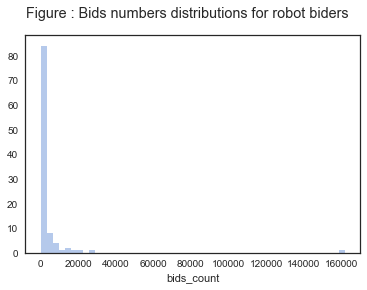

In [36]:
bots_bids_id_counts = pd.DataFrame(bots_bids_id.count()).rename(columns = {'bidder_id':'bids_count'})

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
plt=sns.distplot(bots_bids_id_counts['bids_count'],kde=False)
#plt.set(xscale='log',yscale='log')



pl.suptitle('Figure : Bids numbers distributions for robot biders')

Text(0.5,0.98,'Figure : Bids numbers distributions for human biders')

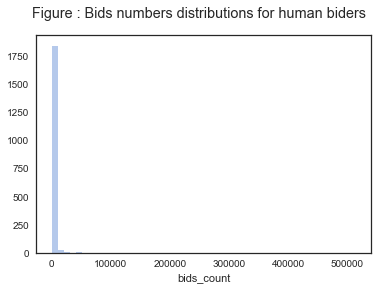

In [37]:
human_bids_id_counts = pd.DataFrame(human_bids_id.count()).rename(columns = {'bidder_id':'bids_count'})

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
plt=sns.distplot(human_bids_id_counts['bids_count'],kde=False)
#plt.set(xscale='log',yscale='log')



pl.suptitle('Figure : Bids numbers distributions for human biders')

Text(0.5,0.98,'Figure : Median number of bids for each acution of robots biders')

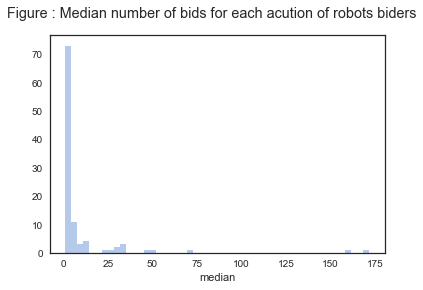

In [38]:
bots_bids_id_auction=bots_bids.groupby(['bidder_id','auction'])
bots_bids_id_auction_df=pd.DataFrame(bots_bids_id_auction.count()['bid_id']).rename(columns={'bid_id':'count'})
#display(bots_bids_id_auction_df)
df_median=pd.DataFrame(bots_bids_id_auction_df.groupby(['bidder_id']).median()).rename(columns={'count':'median'})

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
plt1=sns.distplot(df_median['median'],kde=False)
pl.suptitle('Figure : Median number of bids for each acution of robots biders')

Text(0.5,0.98,'Figure : Median number of bids for each acution of human biders')

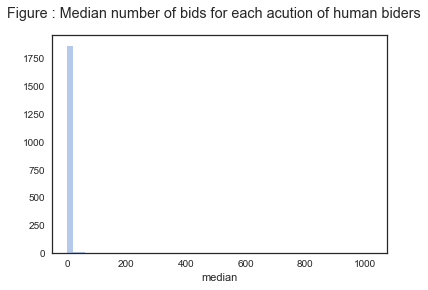

In [39]:
human_bids_id_auction=human_bids.groupby(['bidder_id','auction'])
human_bids_id_auction_df=pd.DataFrame(human_bids_id_auction.count()['bid_id']).rename(columns={'bid_id':'count'})
#display(human_bids_id_auction_df)
df_median=pd.DataFrame(human_bids_id_auction_df.groupby(['bidder_id']).median()).rename(columns={'count':'median'})

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
plt=sns.distplot(df_median['median'],kde=False)
pl.suptitle('Figure : Median number of bids for each acution of human biders')

Text(0.5,0.98,'Figure : Mean number of bids for each acution of robots biders')

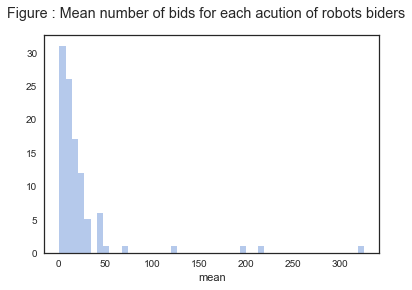

In [40]:
df_mean=pd.DataFrame(bots_bids_id_auction_df.groupby(['bidder_id']).mean()).rename(columns={'count':'mean'})

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
plt1=sns.distplot(df_mean['mean'],kde=False)
pl.suptitle('Figure : Mean number of bids for each acution of robots biders')

Text(0.5,0.98,'Figure : Mean number of bids for each acution of human biders')

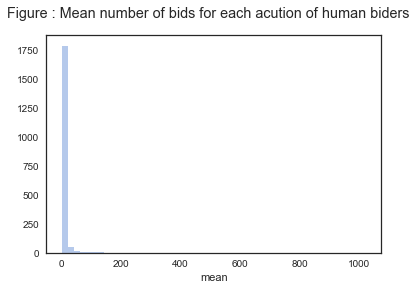

In [41]:
df_mean=pd.DataFrame(human_bids_id_auction_df.groupby(['bidder_id']).mean()).rename(columns={'count':'mean'})

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
plt1=sns.distplot(df_mean['mean'],kde=False)
pl.suptitle('Figure : Mean number of bids for each acution of human biders')

### Bids number variation with time

In [42]:
bots_bids_tim_parttern=pd.DataFrame(bots_bids.sort_values(by=['time']).groupby(pd.cut(bots_bids['time'],500))['bid_id'].count().apply(lambda x:x/len(bid_data))).reset_index().drop(columns=['time']).rename(columns={'bid_id':'robot bid'})
human_bids_tim_parttern=pd.DataFrame(human_bids.sort_values(by=['time']).groupby(pd.cut(human_bids['time'],500))['bid_id'].count().apply(lambda x:x/len(bid_data))).reset_index().drop(columns=['time']).rename(columns={'bid_id':'human bid'})

display(bots_bids_tim_parttern.head())
display(human_bids_tim_parttern.head())


,robot bid
0,0.000402
1,0.000345
2,0.000292
3,0.000253
4,0.000269


,human bid
0,0.005940
1,0.004526
2,0.003733
3,0.003322
4,0.002612


Text(0.5,0.98,'Figure : Number of bids of both human and robot biders')

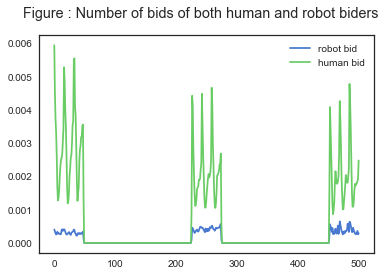

In [43]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")

ax=bots_bids_tim_parttern.plot()
human_bids_tim_parttern.plot(ax=ax)

pl.suptitle('Figure : Number of bids of both human and robot biders')

### Devices comparisons

In [44]:
bots_bids_id_auction_device=bots_bids.groupby(['bidder_id','auction','device'])
bots_bids_id_auction_device_df=pd.DataFrame(bots_bids_id_auction_device.count()['bid_id']).rename(columns={'bid_id':'count'})
display(bots_bids_id_auction_device_df.head())

count
bidder_id                             auction device         
022ac3a7ce986049d9a4bede83ccf9ddctvg6 0leo6   phone424      6
                                      0z23u   phone424     13
                                      13kbi   phone424     11
                                      1f9t0   phone21       3
                                      1l3p3   phone46       1

In [45]:
human_bids_id_auction_device=human_bids.groupby(['bidder_id','auction','device'])
human_bids_id_auction_device_df=pd.DataFrame(human_bids_id_auction_device.count()['bid_id']).rename(columns={'bid_id':'count'})
display(human_bids_id_auction_device_df.head())

count
bidder_id                             auction device         
001068c415025a009fee375a12cff4fcnht8y 4ifac   phone561      1
0030a2dd87ad2733e0873062e4f83954mkj86 obbny   phone313      1
00a0517965f18610417ee784a05f494d4dw6e 166wh   phone22       1
                                      18nth   phone93       1
                                      1cbiu   phone25       1

median
bidder_id                             auction        
022ac3a7ce986049d9a4bede83ccf9ddctvg6 0leo6       6.0
                                      0z23u      13.0
                                      13kbi      11.0
                                      1f9t0       3.0
                                      1l3p3       1.0

Text(0.5,0.98,'Figure : Median number of devices for each acution of robots biders')

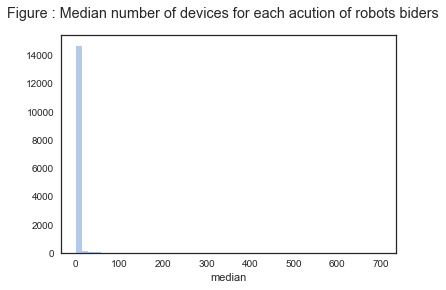

In [46]:
df_median=pd.DataFrame(bots_bids_id_auction_device_df.groupby(['bidder_id','auction']).median()).rename(columns={'count':'median'})
display(df_median.head())
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
plt1=sns.distplot(df_median['median'],kde=False)
pl.suptitle('Figure : Median number of devices for each acution of robots biders')

median
bidder_id                             auction        
001068c415025a009fee375a12cff4fcnht8y 4ifac       1.0
0030a2dd87ad2733e0873062e4f83954mkj86 obbny       1.0
00a0517965f18610417ee784a05f494d4dw6e 166wh       1.0
                                      18nth       1.0
                                      1cbiu       1.0

Text(0.5,0.98,'Figure : Median number of devices for each acution of human biders')

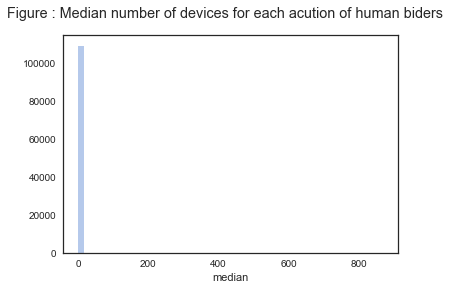

In [47]:
df_median=pd.DataFrame(human_bids_id_auction_device_df.groupby(['bidder_id','auction']).median()).rename(columns={'count':'median'})
display(df_median.head())
sns.set(color_codes=True)
sns.set(style="white", palette="muted")

plt1=sns.distplot(df_median['median'],kde=False)
pl.suptitle('Figure : Median number of devices for each acution of human biders')

From the devices perspective, it seems that the differences are not so obvious.

### Bid time comparisons

**Time interval between one auction**

In [48]:
bots_id_auction_sort=bots_bids.sort_values(by=['bidder_id','auction'])
bots_id_auction_sort['time_diff']=bots_id_auction_sort.groupby(['bidder_id','auction'])['time'].diff().fillna(0).apply(lambda x:x/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)
display(bots_id_auction_sort.head(n=10))

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,time_diff
7255663,7255663,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0leo6,home goods,phone424,9707047157894736,au,160.196.166.214,rmdm1f1lak48s6g,0.000000
7256465,7256465,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0leo6,home goods,phone424,9707052842105263,au,160.196.166.214,rmdm1f1lak48s6g,31.311665
7258486,7258486,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0leo6,home goods,phone424,9707067421052631,au,249.159.5.3,rmdm1f1lak48s6g,80.308622
7260821,7260821,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0leo6,home goods,phone424,9707083842105263,au,108.224.222.108,vasstdc27m7nks3,90.455921
7261038,7261038,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0leo6,home goods,phone424,9707085421052631,au,86.68.198.48,rmdm1f1lak48s6g,8.697685
7540314,7540314,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0leo6,home goods,phone424,9708674000000000,au,160.196.166.214,rmdm1f1lak48s6g,8750.740576
7257998,7257998,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0z23u,home goods,phone424,9707063789473684,au,249.159.5.3,rmdm1f1lak48s6g,0.000000
7258967,7258967,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0z23u,home goods,phone424,9707070684210526,au,160.196.166.214,rmdm1f1lak48s6g,37.979890
7258997,7258997,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0z23u,home goods,phone424,9707070842105263,au,180.220.99.159,rmdm1f1lak48s6g,0.869768
7259926,7259926,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0z23u,home goods,phone424,9707077736842105,au,108.224.222.108,vasstdc27m7nks3,37.979890


In [49]:
bots_id_auction_sort['time_diff'].describe()

count    412416.000000
mean       1701.677583
std       17054.203092
min           0.000000
25%           3.479074
50%          25.803131
75%         202.945976
max      418290.502156
Name: time_diff, dtype: float64

In [50]:
human_id_auction_sort=human_bids.sort_values(by=['bidder_id','auction'])
human_id_auction_sort['time_diff']=human_id_auction_sort.groupby(['bidder_id','auction'])['time'].diff().fillna(0).apply(lambda x:x/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)
display(human_id_auction_sort.head(n=10))

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,time_diff
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3,0.0
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv,0.0
4701256,4701256,00a0517965f18610417ee784a05f494d4dw6e,166wh,books and music,phone22,9642931421052631,in,193.71.201.32,374bayryqpu97vx,0.0
6684377,6684377,00a0517965f18610417ee784a05f494d4dw6e,18nth,books and music,phone93,9703932157894736,in,102.195.159.149,6m5k8lxl8andqr5,0.0
6511001,6511001,00a0517965f18610417ee784a05f494d4dw6e,1cbiu,books and music,phone25,9702976578947368,in,86.245.94.173,q7mzsnjxikn3tq3,0.0
7386210,7386210,00a0517965f18610417ee784a05f494d4dw6e,1olil,books and music,phone111,9707820894736842,ru,104.184.44.90,zvajsvy7zntl1kp,0.0
7380657,7380657,00a0517965f18610417ee784a05f494d4dw6e,21gh7,books and music,phone138,9707791315789473,in,171.109.176.98,6gqgyk18p64lhus,0.0
4361678,4361678,00a0517965f18610417ee784a05f494d4dw6e,2n3xc,books and music,phone15,9641377157894736,th,128.3.198.137,vasstdc27m7nks3,0.0
7172414,7172414,00a0517965f18610417ee784a05f494d4dw6e,2xtpx,books and music,phone63,9706267210526315,th,20.194.158.78,keniaim7gr1gohf,0.0
7294317,7294317,00a0517965f18610417ee784a05f494d4dw6e,32zny,books and music,phone23,9707292421052631,in,231.100.103.147,vasstdc27m7nks3,0.0


In [51]:
human_id_auction_sort['time_diff'].describe()

count    2.658808e+06
mean     2.597634e+03
std      2.322691e+04
min      0.000000e+00
25%      4.058920e+00
50%      2.551321e+01
75%      2.020762e+02
max      4.250185e+05
Name: time_diff, dtype: float64

In [52]:
bots_id_time_sort=bots_bids.sort_values(by=['bidder_id','time'])
bots_id_time_sort['time_diff']=bots_id_time_sort.groupby(['bidder_id'])['time'].diff().fillna(0).apply(lambda x:x/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)
display(bots_id_time_sort.head(n=10))

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,time_diff
5575412,5575412,022ac3a7ce986049d9a4bede83ccf9ddctvg6,xsj5g,home goods,phone55,9697126000000000,us,101.82.73.194,vasstdc27m7nks3,0.000000
5575703,5575703,022ac3a7ce986049d9a4bede83ccf9ddctvg6,wceo9,home goods,phone55,9697128578947368,us,61.127.231.137,vasstdc27m7nks3,14.206218
5575704,5575704,022ac3a7ce986049d9a4bede83ccf9ddctvg6,2pxeq,home goods,phone55,9697128578947368,us,61.127.231.137,vasstdc27m7nks3,0.000000
5576150,5576150,022ac3a7ce986049d9a4bede83ccf9ddctvg6,skcce,home goods,phone55,9697132578947368,us,188.18.88.125,vasstdc27m7nks3,22.034135
5576668,5576668,022ac3a7ce986049d9a4bede83ccf9ddctvg6,skcce,home goods,phone55,9697137947368421,us,188.18.88.125,vasstdc27m7nks3,29.572128
5577028,5577028,022ac3a7ce986049d9a4bede83ccf9ddctvg6,hj8j0,home goods,phone55,9697141526315789,us,61.127.231.137,vasstdc27m7nks3,19.714752
5577029,5577029,022ac3a7ce986049d9a4bede83ccf9ddctvg6,outre,home goods,phone55,9697141526315789,us,61.127.231.137,vasstdc27m7nks3,0.000000
5578602,5578602,022ac3a7ce986049d9a4bede83ccf9ddctvg6,ngxwj,home goods,phone165,9697157263157894,ua,52.23.255.65,vasstdc27m7nks3,86.686924
5578603,5578603,022ac3a7ce986049d9a4bede83ccf9ddctvg6,tj9yj,home goods,phone165,9697157263157894,ua,52.23.255.65,vasstdc27m7nks3,0.000000
5579847,5579847,022ac3a7ce986049d9a4bede83ccf9ddctvg6,uvnl7,home goods,phone168,9697169842105263,ua,52.23.255.65,vasstdc27m7nks3,69.291555


In [53]:
bots_id_time_sort['time_diff'].describe()

count    412416.000000
mean         39.030156
std        2363.227656
min           0.000000
25%           0.579846
50%           1.739537
75%           7.537993
max      348802.089791
Name: time_diff, dtype: float64

In [54]:
human_id_time_sort=human_bids.sort_values(by=['bidder_id','time'])
human_id_time_sort['time_diff']=human_id_time_sort.groupby(['bidder_id'])['time'].diff().fillna(0).apply(lambda x:x/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)
display(human_id_time_sort.head(n=10))

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,time_diff
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3,0.000000
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv,0.000000
2501797,2501797,00a0517965f18610417ee784a05f494d4dw6e,l3o6q,books and music,phone451,9632299631578947,bh,103.165.41.136,kk7rxe25ehseyci,0.000000
2724778,2724778,00a0517965f18610417ee784a05f494d4dw6e,du967,books and music,phone117,9633184947368421,tr,239.250.228.152,iu2iu3k137vakme,4876.791811
2742648,2742648,00a0517965f18610417ee784a05f494d4dw6e,wx3kf,books and music,phone16,9633287000000000,in,255.108.248.101,u85yj2e7owkz6xp,562.160354
2852666,2852666,00a0517965f18610417ee784a05f494d4dw6e,gb2b8,books and music,phone1008,9634158210526315,id,255.107.151.243,kk7rxe25ehseyci,4799.092494
2915632,2915632,00a0517965f18610417ee784a05f494d4dw6e,cci6c,books and music,phone154,9634606052631578,ng,37.95.134.218,vasstdc27m7nks3,2466.953303
3980517,3980517,00a0517965f18610417ee784a05f494d4dw6e,bpil5,books and music,phone419,9640088105263157,in,58.209.11.187,jynce1r4nc22vrd,30198.071352
4040347,4040347,00a0517965f18610417ee784a05f494d4dw6e,gst86,books and music,phone154,9640374105263157,ng,37.95.134.218,hp6dl92uen73trp,1575.440622
4361678,4361678,00a0517965f18610417ee784a05f494d4dw6e,2n3xc,books and music,phone15,9641377157894736,th,128.3.198.137,vasstdc27m7nks3,5525.349166


In [55]:
human_id_time_sort['time_diff'].describe()

count    2.658808e+06
mean     1.233275e+02
std      4.827010e+03
min      0.000000e+00
25%      2.899228e-01
50%      1.159691e+00
75%      6.668225e+00
max      4.192156e+05
Name: time_diff, dtype: float64

It appears that the mean number of time interval between each bid by every bidder could have some difference between robots and human.

### Url comparisons

In [56]:
bots_id_auction_url_sort=bots_bids.sort_values(by=['bidder_id','auction','url'])
display(bots_id_auction_url_sort.groupby(['bidder_id','auction'])['url'].nunique())
bots_id_auction_url_sort.groupby(['bidder_id','auction'])['url'].nunique().groupby(['bidder_id']).max().describe()

bidder_id                              auction
022ac3a7ce986049d9a4bede83ccf9ddctvg6  0leo6      2
                                       0z23u      2
                                       13kbi      2
                                       1f9t0      1
                                       1l3p3      1
                                       1pi3q      2
                                       2a88r      2
                                       2pxeq      2
                                       2vi6u      2
                                       32aid      1
                                       3enx1      2
                                       4043u      2
                                       436hc      1
                                       4e1vr      2
                                       4fp5l      1
                                       4kj98      1
                                       4xiqp      2
                                       5klrx      2
                 

count     103.000000
mean      126.747573
std       308.839882
min         1.000000
25%         2.500000
50%        17.000000
75%       124.500000
max      1867.000000
Name: url, dtype: float64

In [57]:
human_id_auction_url_sort=human_bids.sort_values(by=['bidder_id','auction','url'])
display(human_id_auction_url_sort.groupby(['bidder_id','auction'])['url'].nunique())
human_id_auction_url_sort.groupby(['bidder_id','auction'])['url'].nunique().groupby(['bidder_id']).max().describe()

bidder_id                              auction
001068c415025a009fee375a12cff4fcnht8y  4ifac       1
0030a2dd87ad2733e0873062e4f83954mkj86  obbny       1
00a0517965f18610417ee784a05f494d4dw6e  166wh       1
                                       18nth       1
                                       1cbiu       1
                                       1olil       1
                                       21gh7       1
                                       2n3xc       1
                                       2xtpx       1
                                       32zny       2
                                       38phk       1
                                       3il9i       3
                                       3k2nx       1
                                       3vssd       1
                                       45aux       1
                                       56eak       1
                                       5edd6       1
                                       5mvvs       1

count    1881.000000
mean       54.537480
std       286.881163
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max      5026.000000
Name: url, dtype: float64

## First Feature construction

In this step, we need to preliminarily construct our own features for training:

- Mean number of bids for each auction by every bidder.
- Mean number of time interval between each bid by every bidder.
- Maximum number of diverse urls within all auctions by every bidder.
- Number of bids.
- Number of unique auctions.
- Number of unique devices.
- Bid time interval (last bid time stamp - first bid time stamp) within all 9 days by every bidder.
- Bids number in 9 time intervals by each bidder.  


In [25]:
train_set=pd.DataFrame()
label_set=pd.DataFrame()
train_set['bidder_id']=train_data.loc[train_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
label_set['bidder_id']=train_data.loc[train_data['bidder_id'].isin(list(train_set['bidder_id']))]['bidder_id']
label_set['outcome']=train_data.loc[train_data['bidder_id'].isin(list(train_set['bidder_id']))]['outcome']

train_set.reset_index(inplace=True)
train_set=train_set.drop(['index'],axis=1)
label_set.reset_index(inplace=True)
label_set=label_set.drop(['index'],axis=1)

print('Number of bidders info for training:',len(train_set))
display(train_set.head())
print('Number of the bidders labels:',len(label_set))
display(label_set.head())

Number of bidders info for training: 1984


,bidder_id
0,91a3c57b13234af24875c56fb7e2b2f4rb56a
1,624f258b49e77713fc34034560f93fb3hu3jo
2,1c5f4fc669099bfbfac515cd26997bd12ruaj
3,4bee9aba2abda51bf43d639013d6efe12iycd
4,4ab12bc61c82ddd9c2d65e60555808acqgos1


Number of the bidders labels: 1984


,bidder_id,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0


In [26]:
#Mean number of bids for each auction by every bidder.
bidder_id_auction_df=pd.DataFrame(bid_data.groupby(['bidder_id','auction']).count().groupby(['bidder_id']).mean()).reset_index().rename(columns={'bid_id':'mean_num_auction_bids'})
train_set['mean_num_auction_bids']=bidder_id_auction_df.loc[bidder_id_auction_df['bidder_id'].isin(list(train_set['bidder_id']))].set_index(['bidder_id']).reindex(index=train_set['bidder_id']).reset_index()['mean_num_auction_bids']

display(train_set.head())


,bidder_id,mean_num_auction_bids
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333
1,624f258b49e77713fc34034560f93fb3hu3jo,3.000000
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130


In [27]:
#Mean number of time interval between each bid by every bidder.
bid_data['bid_time_interval']=bid_data.sort_values(by=['bidder_id','time']).groupby(['bidder_id'])['time'].diff().fillna(0).apply(lambda x:x/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)
#display(pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['bid_time_interval'].mean()).reindex(index=train_set['bidder_id']).reset_index())
train_set['mean_bid_time_interval']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['bid_time_interval'].mean()).reindex(index=train_set['bidder_id']).reset_index()['bid_time_interval']
display(train_set.head())

,bidder_id,mean_num_auction_bids,mean_bid_time_interval
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,3014.907439
1,624f258b49e77713fc34034560f93fb3hu3jo,3.000000,11874.852279
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,9828.601152
3,4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,0.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,425.683394


In [28]:
#Maximum number of diverse urls within all auctions by every bidder.
train_set['max_urls_per_auction']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id','auction'])['url'].nunique().groupby(['bidder_id']).max()).reindex(index=train_set['bidder_id']).reset_index()['url']
display(train_set.head())

,bidder_id,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,3014.907439,1
1,624f258b49e77713fc34034560f93fb3hu3jo,3.000000,11874.852279,2
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,9828.601152,1
3,4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,0.000000,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,425.683394,21


In [29]:
#Number of bids by every bidder.
train_set['number_of_bids']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['bid_id'].count()).reindex(index=train_set['bidder_id']).reset_index()['bid_id']

display(train_set.head())

,bidder_id,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,3014.907439,1,24
1,624f258b49e77713fc34034560f93fb3hu3jo,3.000000,11874.852279,2,3
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,9828.601152,1,4
3,4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,0.000000,1,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,425.683394,21,155


In [30]:
#Number of unique auctions by every bidder.
train_set['num_of_unique_auctions']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['auction'].nunique()).reindex(index=train_set['bidder_id']).reset_index()['auction']
display(train_set.head())

,bidder_id,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,3014.907439,1,24,18
1,624f258b49e77713fc34034560f93fb3hu3jo,3.000000,11874.852279,2,3,1
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,9828.601152,1,4,4
3,4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,0.000000,1,1,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,425.683394,21,155,23


In [31]:
#Number of unique devices by every bidder.
train_set['num_of_unique_devices']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['device'].nunique()).reindex(index=train_set['bidder_id']).reset_index()['device']
display(train_set.head())

,bidder_id,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions,num_of_unique_devices
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,3014.907439,1,24,18,14
1,624f258b49e77713fc34034560f93fb3hu3jo,3.000000,11874.852279,2,3,1,2
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,9828.601152,1,4,4,2
3,4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,0.000000,1,1,1,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,425.683394,21,155,23,53


In [32]:
#Bid time interval (last bid time step- first bid time step) within all 9 days by every bidder.
train_set['tot_bid_tim']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['time'].apply(lambda x:(max(x)-min(x)))).reindex(index=train_set['bidder_id']).reset_index()['time']
display(train_set.head())

,bidder_id,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions,num_of_unique_devices,tot_bid_tim
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,3014.907439,1,24,18,14,13135578947369
1,624f258b49e77713fc34034560f93fb3hu3jo,3.000000,11874.852279,2,3,1,2,6467157894737
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,9828.601152,1,4,4,2,7137000000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,0.000000,1,1,1,1,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,425.683394,21,155,23,53,11977947368422


In [33]:
#Bids number in 9 days by each bidder.
bid_data['time_range_9']=pd.cut(bid_data['time'],9,include_lowest=True)
bid_in_ranges=pd.DataFrame(bid_data.groupby(['bidder_id','time_range_9']).count().fillna(0)['bid_id'])
bid_in_ranges=pd.DataFrame(pd.pivot_table(bid_in_ranges,values=['bid_id'],columns=['time_range_9'],index=['bidder_id']).to_records())
bid_in_ranges.columns=['bidder_id','bids_day1','bids_day2','bids_day3','bids_day4','bids_day5','bids_day6','bids_day7','bids_day8','bids_day9']
display(bid_in_ranges.head())



,bidder_id,bids_day1,bids_day2,bids_day3,bids_day4,bids_day5,bids_day6,bids_day7,bids_day8,bids_day9
0,001068c415025a009fee375a12cff4fcnht8y,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,002d229ffb247009810828f648afc2ef593rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,00486a11dff552c4bd7696265724ff81yeo9v,15.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


In [34]:
bid_in_ranges=bid_in_ranges.loc[bid_in_ranges['bidder_id'].isin(list(train_set['bidder_id']))].set_index(['bidder_id']).reindex(train_set['bidder_id']).reset_index()
bid_in_ranges=bid_in_ranges.drop(['bidder_id'],axis=1)
train_set=pd.concat([train_set,bid_in_ranges],axis=1)
display(train_set.head())

,bidder_id,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,bids_day5,bids_day6,bids_day7,bids_day8,bids_day9
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,3014.907439,1,24,18,14,13135578947369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
1,624f258b49e77713fc34034560f93fb3hu3jo,3.000000,11874.852279,2,3,1,2,6467157894737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,9828.601152,1,4,4,2,7137000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,0.000000,1,1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,425.683394,21,155,23,53,11977947368422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0


In [35]:
train_set=train_set.drop(['bidder_id'],axis=1)


In [36]:
display(train_set.head())

,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,bids_day5,bids_day6,bids_day7,bids_day8,bids_day9
0,1.333333,3014.907439,1,24,18,14,13135578947369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
1,3.000000,11874.852279,2,3,1,2,6467157894737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1.000000,9828.601152,1,4,4,2,7137000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,1.000000,0.000000,1,1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6.739130,425.683394,21,155,23,53,11977947368422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0


In [37]:
label_set=label_set.drop(['bidder_id'],axis=1)

In [38]:
display(label_set.head())

,outcome
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Preprocessing of the numerical features

In [39]:
#Import necessary libraries for the feature preprocess
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [40]:
numerical=['mean_num_auction_bids','mean_bid_time_interval','max_urls_per_auction','number_of_bids','num_of_unique_auctions','num_of_unique_devices','tot_bid_tim','bids_day1','bids_day2','bids_day3','bids_day4','bids_day5','bids_day6','bids_day7','bids_day8','bids_day9']


In [41]:
#Skewed data preprocessed by log transformation
feature_set=train_set.copy()
feature_set[numerical]=feature_set[numerical].apply(lambda x:np.log(x+1))
display(feature_set.head())

,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,bids_day5,bids_day6,bids_day7,bids_day8,bids_day9
0,0.847298,8.011656,0.693147,3.218876,2.944439,2.708050,30.206346,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.218876
1,1.386294,9.382262,1.098612,1.386294,0.693147,1.098612,29.497758,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.386294
2,0.693147,9.193154,0.693147,1.609438,1.609438,1.098612,29.596314,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.609438
3,0.693147,0.000000,0.693147,0.693147,0.693147,0.693147,0.000000,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000
4,2.046289,6.056042,3.091042,5.049856,3.178054,3.988984,30.114088,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,5.049856


In [42]:
#Data preprocessed by MinMaxScaler
scalar=MinMaxScaler()

feature_set[numerical]=scalar.fit_transform(feature_set[numerical])
display(feature_set.head())


,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,bids_day5,bids_day6,bids_day7,bids_day8,bids_day9
0,0.024708,0.653853,0.000000,0.202726,0.336039,0.280729,0.944575,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.264532
1,0.111102,0.765712,0.051787,0.055635,0.000000,0.056492,0.922417,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.113928
2,0.000000,0.750278,0.000000,0.073545,0.136770,0.056492,0.925498,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.132266
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.05829,0.0,0.0,0.0,0.000000
4,0.216891,0.494250,0.306267,0.349688,0.370909,0.459196,0.941690,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.415005


In [43]:
feature_set.to_csv('feature_set_orig.csv')


## Model comparison with cross validation

In this part, I would like to try out several ensemble models:

- RandomForest
- GBDT
- XGBoosting


In [45]:
# import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,15

In [46]:
def model_compare(model,feature_set,label_set,model_name,color,kfold=10):
    cv=StratifiedKFold(n_splits=kfold)
    tprs=[]
    aucs=[]
    mean_fpr=np.linspace(0,1,100)

    i=0
    for train, val in cv.split(feature_set,label_set):
        probas_=model.fit(feature_set.iloc[train],label_set.iloc[train].values.ravel()).predict_proba(feature_set.iloc[val])
        #compute ROC curve and AUC
        fpr,tpr,threshold=roc_curve(label_set.iloc[val].values.ravel(),probas_[:,1])
        tprs.append(interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)
    #    plt.plot(fpr1,tpr1,lw=1,alpha=0.3,label='ROC fold %d (AUC=%0.2f)' % (i,roc_auc1))
    
        i+=1
    
    plt.plot([0,1],[0,1],linestyle='--',lw=2,color='r',label='Luck',alpha=0.8)

    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)
    std_auc=np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color=color,
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f) %s' % (mean_auc, std_auc,model_name),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=color, alpha=.2,
                     label=r'$\pm$ 1 std. dev. %s'%(model_name))
    plt.legend()


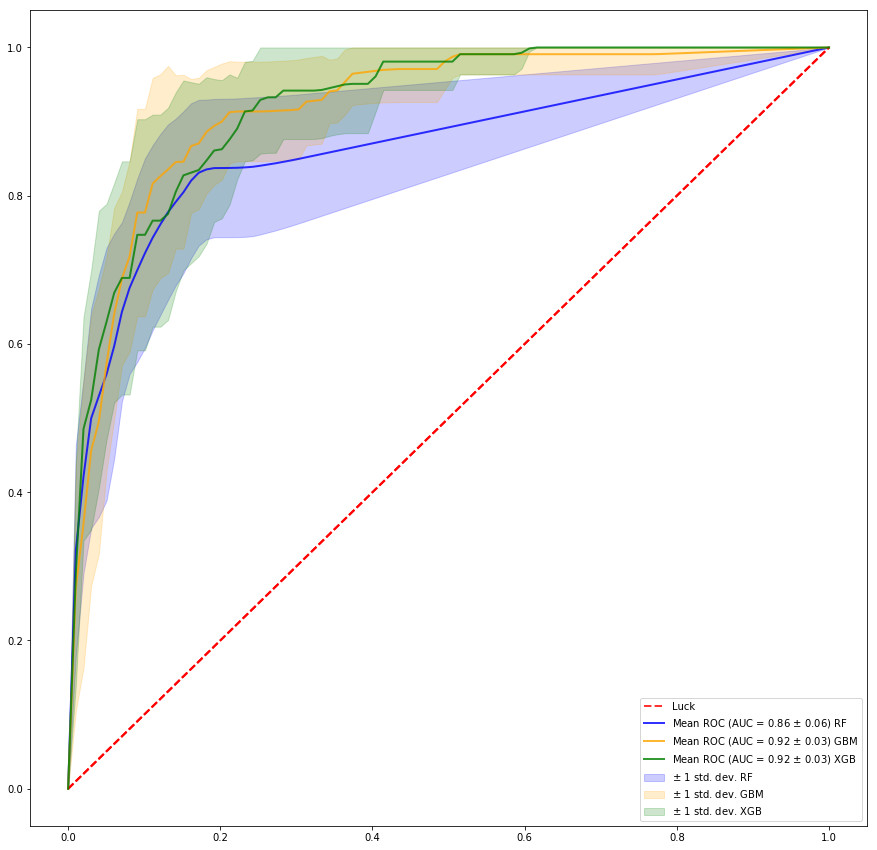

In [47]:
classifier1=RandomForestClassifier(random_state=10)
classifier2=GradientBoostingClassifier(random_state=10)
classifier3=XGBClassifier(random_state=10)

model_compare(classifier1,feature_set,label_set,model_name='RF',color='blue')
model_compare(classifier2,feature_set,label_set,model_name='GBM',color='orange')
model_compare(classifier3,feature_set,label_set,model_name='XGB',color='green')

By comparing the ROC and AUC values of 3 ensemble models, xgboost and GBDT have the best performance. In the following, we will firstly try to continue the parameter tuning and the feature engineering with xgboost. 

Xgboost has become a very powerful weapon of the data scientist, many useful materials are out there for references:
- [Xgboost paper](https://arxiv.org/abs/1603.02754)
- [Xgboost introduction](http://xgboost.readthedocs.io/en/latest/model.html)
- [Guide of parameter tuning for xgboost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
- [Parallelization of xgboost](http://zhanpengfang.github.io/418home.html)

## Parameter tuning

According to the parameter tuning guide of xgboost：
1. Choose a relatively high learning rate, and find the optimum number of estimators given this learning rate.
2. With the 

### 1. Find the optimum number of estimators by given learning rate

In [48]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=24,8



In [163]:
def modelfit(alg,train_set,label_set,useTrainCV=True,cv_folds=10,early_stopping_rounds=50,n_repeats=100):
    
    if useTrainCV:
        xgb_param=alg.get_xgb_params()
        xgtrain=xgb.DMatrix(train_set,label_set.values.ravel())
        cvresult=xgb.cv(xgb_param,xgtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,metrics='auc',early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
        print('Optimum number of estimators is %d'% cvresult.shape[0])
    
    cv_=RepeatedStratifiedKFold(n_splits=cv_folds,n_repeats=n_repeats,random_state=17)
    aucs=[]
    for train, val in cv_.split(train_set,label_set):
        alg.fit(train_set.iloc[train],label_set.iloc[train].values.ravel(),eval_metric='auc')
    
        dtrain_predprob=alg.predict_proba(train_set.iloc[val])[:,1]
    
        aucs.append(metrics.roc_auc_score(label_set.iloc[val].values.ravel(),dtrain_predprob))
    
    print('Mean AUC score is %f' % np.mean(aucs))
    
    feat_imp=pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    fig=feat_imp.plot(kind='bar',title='Feature Importances')
    plt.ylabel('Feature Importance Score',fontsize=30)
    
    for label in fig.xaxis.get_ticklabels():
        label.set_fontsize(30)

    
    
    

Optimum number of estimators is 77
Mean AUC score is 0.926769


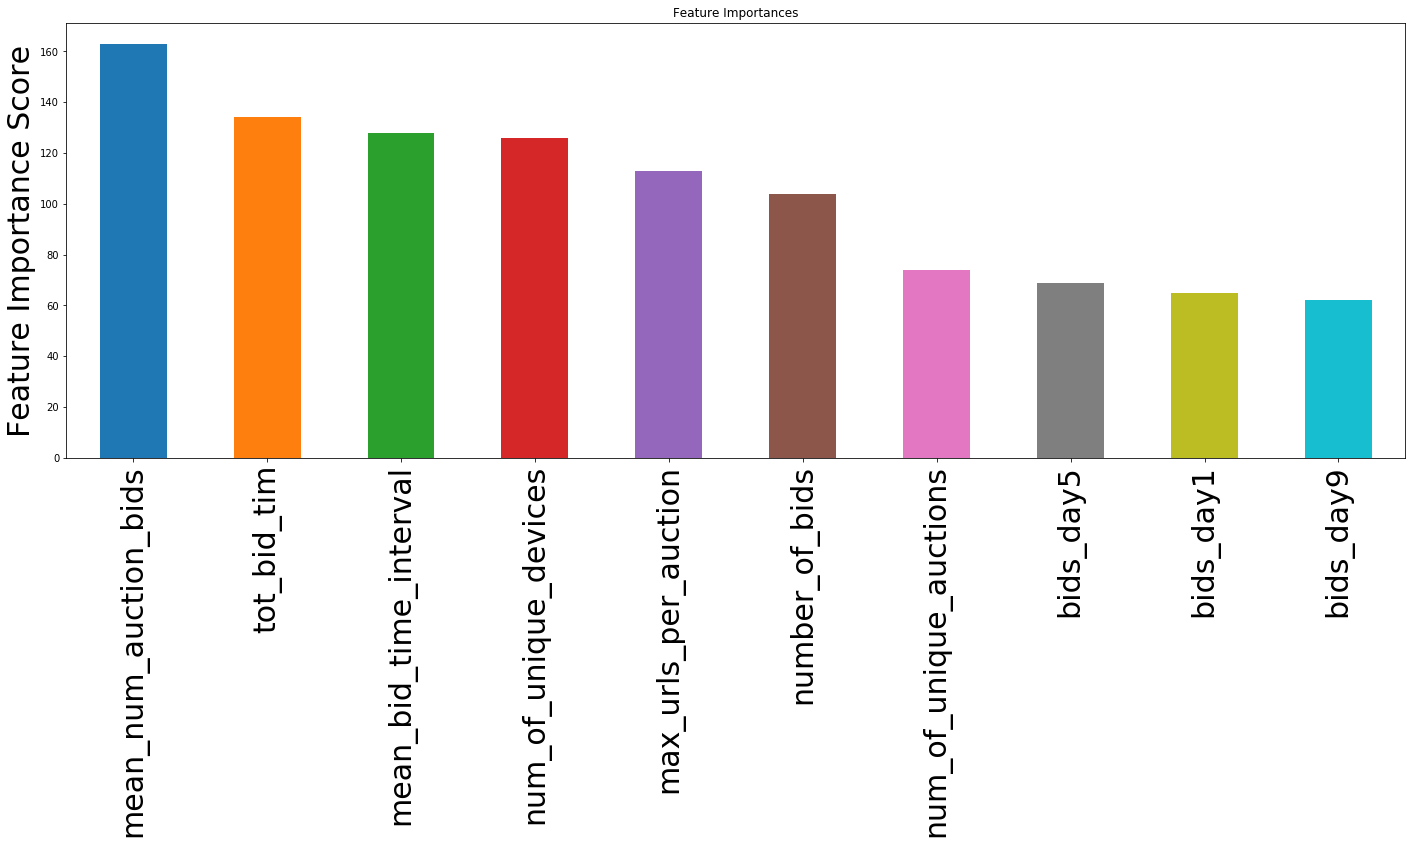

In [50]:
xgb1=XGBClassifier(learning_rate=0.05,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=10)

modelfit(xgb1,feature_set,label_set)

The optimum number of estimators given learning rate 0.05 is 77.

### 2. Tune max_depth and min_weight

In [52]:
param_1={'max_depth':[i for i in range(1,10,2)],'min_child_weight':[i for i in range(1,6,2)]}

gsearch1=GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,n_estimators=77,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',scale_pos_weight=1,seed=10),param_grid=param_1,scoring='roc_auc',iid=False,cv=10)
gsearch1.fit(feature_set,label_set.values.ravel())
#print(gsearch1.grid_scores_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'min_child_weight': 1, 'max_depth': 9}
0.9293438692906776


In [53]:
param_2={'max_depth':[8,9,10],'min_child_weight':[0,1,2]}

gsearch2=GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,n_estimators=77,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',scale_pos_weight=1,seed=10),param_grid=param_2,scoring='roc_auc',iid=False,cv=10)
gsearch2.fit(feature_set,label_set.values.ravel())
#print(gsearch2.grid_scores_)
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'min_child_weight': 1, 'max_depth': 8}
0.93024875144556


The optimum max_depth is 8, and the optimum min_child_weight is 1

### 3. Tune gamma

In [54]:
param_3={'gamma':[i/10. for i in range(20)]}

gsearch3=GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,n_estimators=77,max_depth=8,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',scale_pos_weight=1,seed=10),param_grid=param_3,scoring='roc_auc',iid=False,cv=10)
gsearch3.fit(feature_set,label_set.values.ravel())
#print(gsearch3.grid_scores_)
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'gamma': 1.3}
0.933128217330345


The optimum value of gamma is 1.3

### So far

With the optimum values:
- max_depth: 8
- min_child_weight: 1
- gamma: 1.3

We have achieved an improvement of the auc score by about 0.01

### 4. Tune subsample and colsample_bytree

In [55]:
param_4={'subsample':[i/10. for i in range(1,10)],'colsample_bytree':[i/10. for i in range(1,10)]}

gsearch4=GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,n_estimators=77,max_depth=8,min_child_weight=1,gamma=1.3,objective='binary:logistic',scale_pos_weight=1,seed=10),param_grid=param_4,scoring='roc_auc',iid=False,cv=10)
gsearch4.fit(feature_set,label_set.values.ravel())
#print(gsearch4.grid_scores_)
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'colsample_bytree': 0.8, 'subsample': 0.8}
0.933128217330345


In [56]:
param_5={'subsample':[i/100. for i in range(75,90)],'colsample_bytree':[i/100. for i in range(75,90)]}

gsearch5=GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,n_estimators=77,max_depth=8,min_child_weight=1,gamma=1.3,objective='binary:logistic',scale_pos_weight=1,seed=10),param_grid=param_5,scoring='roc_auc',iid=False,cv=10)
gsearch5.fit(feature_set,label_set.values.ravel())
#print(gsearch5.grid_scores_)
print(gsearch5.best_params_)
print(gsearch5.best_score_)

{'colsample_bytree': 0.75, 'subsample': 0.8}
0.933128217330345


Hence the optimum values are:
- subsample: 0.8
- colsample_bytree: 0.75

### 5. Tune regularization parameters

In [57]:
param_6={'reg_alpha':[0,1e-5, 1e-2, 0.1, 1,10,100],'reg_lambda':[1e-5, 1e-2, 0.1, 1,10,100]}

gsearch6=GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,n_estimators=77,max_depth=8,min_child_weight=1,gamma=1.3,subsample=0.8,colsample_bytree=0.75,objective='binary:logistic',scale_pos_weight=1,seed=10),param_grid=param_6,scoring='roc_auc',iid=False,cv=10)
gsearch6.fit(feature_set,label_set.values.ravel())
#print(gsearch6.grid_scores_)
print(gsearch6.best_params_)
print(gsearch6.best_score_)



{'reg_alpha': 0, 'reg_lambda': 1}
0.933128217330345


It seems that the default values for these two parameters work just fine. 

### So far

With further optimum value:

- subsample: 0.8
- colsample_bytree: 0.75
- reg_alpha: 0
- reg_lambda:1


### Further tuning learning rate

Now we further tune the learning rate and the number of estimators.

In [58]:
param_8={'learning_rate':[0.001,0.005,0.01,0.05,0.1],'n_estimators': [i*10 for i in range(20)]}

gsearch8=GridSearchCV(estimator=XGBClassifier(max_depth=8,min_child_weight=1,gamma=1.3,subsample=0.8,colsample_bytree=0.75,objective='binary:logistic',scale_pos_weight=1,seed=10),param_grid=param_8,scoring='roc_auc',iid=False,cv=10)
gsearch8.fit(feature_set,label_set.values.ravel())
#print(gsearch8.grid_scores_)
print(gsearch8.best_params_)
print(gsearch8.best_score_)

{'learning_rate': 0.05, 'n_estimators': 100}
0.9332581514230449


Optimum number of estimators is 100
Mean AUC score is 0.926060


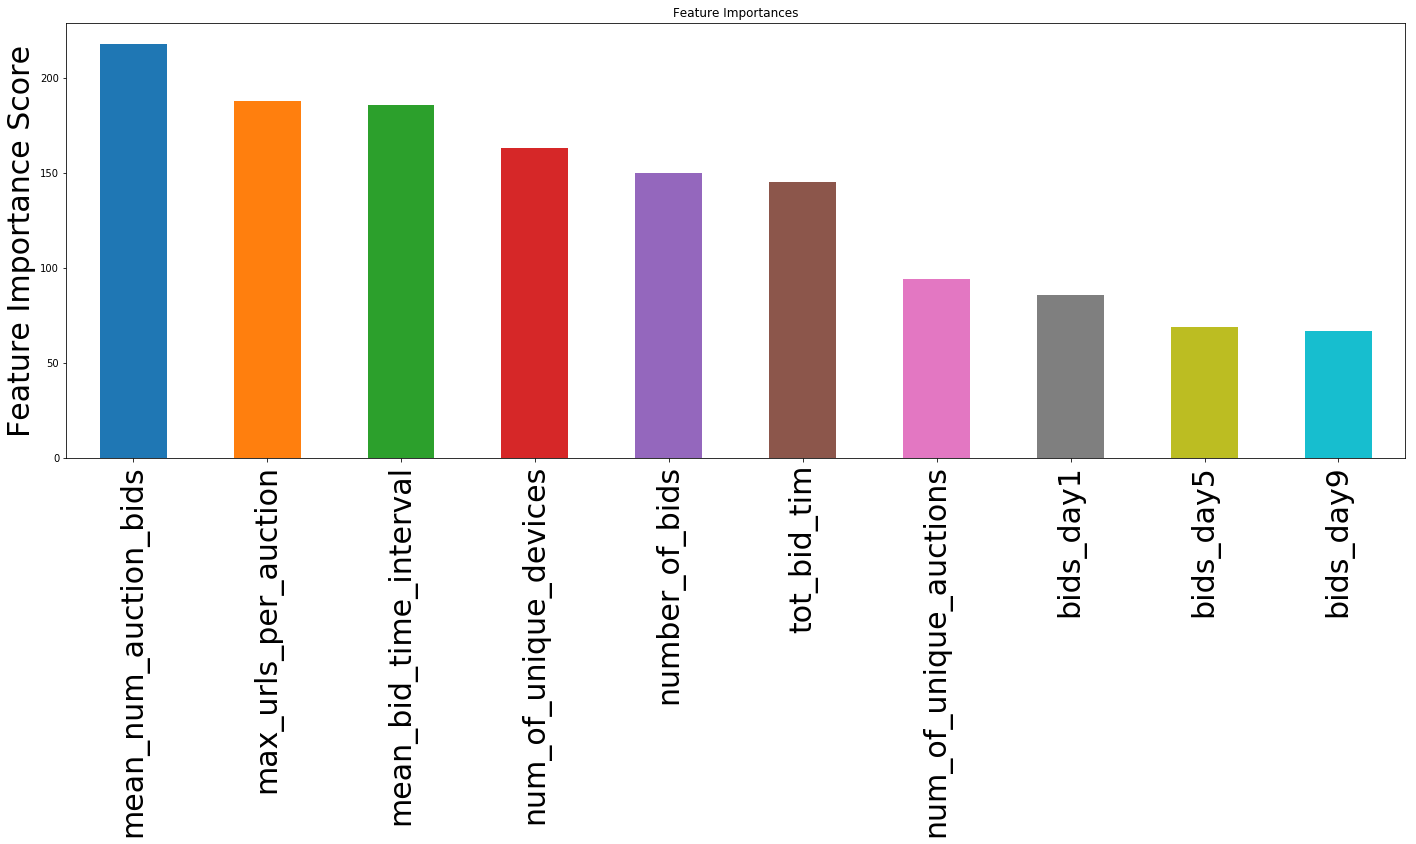

In [59]:
xgb4=XGBClassifier(learning_rate=0.05,n_estimators=100,max_depth=8,min_child_weight=1,gamma=1.3,subsample=0.8,colsample_bytree=0.75,objective='binary:logistic',scale_pos_weight=1,seed=10)

modelfit(xgb4,feature_set,label_set)



By tuning the hyperparameters, so far the auc score with 100times CV has reached 0.926060. It is even a little worse than the initial parameters.

Optimum number of estimators is 100
Mean AUC score is 0.921531


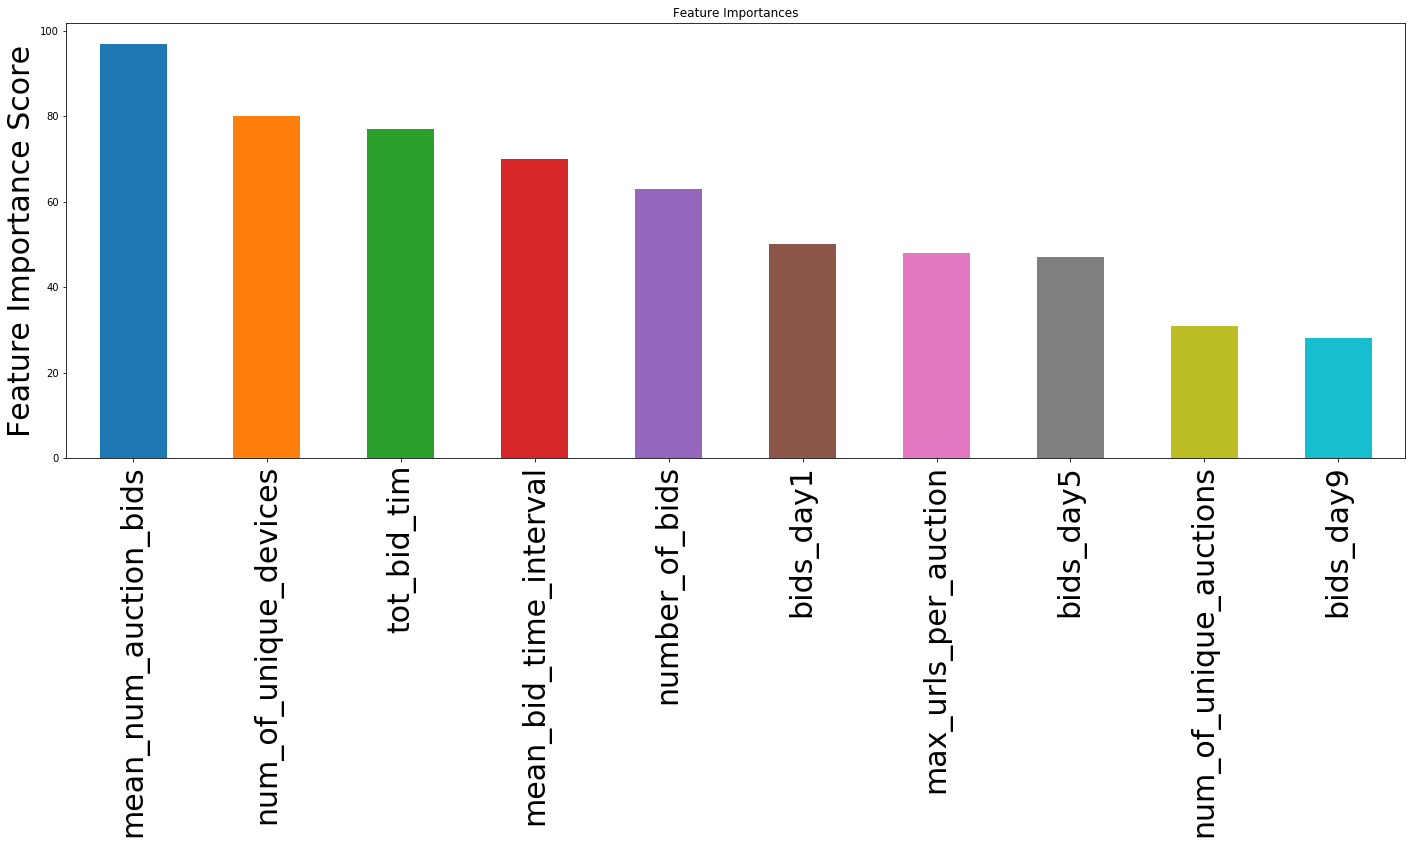

In [77]:
xgb5=XGBClassifier(objective='binary:logistic',seed=20)
modelfit(xgb5,feature_set,label_set)

Optimum number of estimators is 215
Mean AUC score is 0.924132


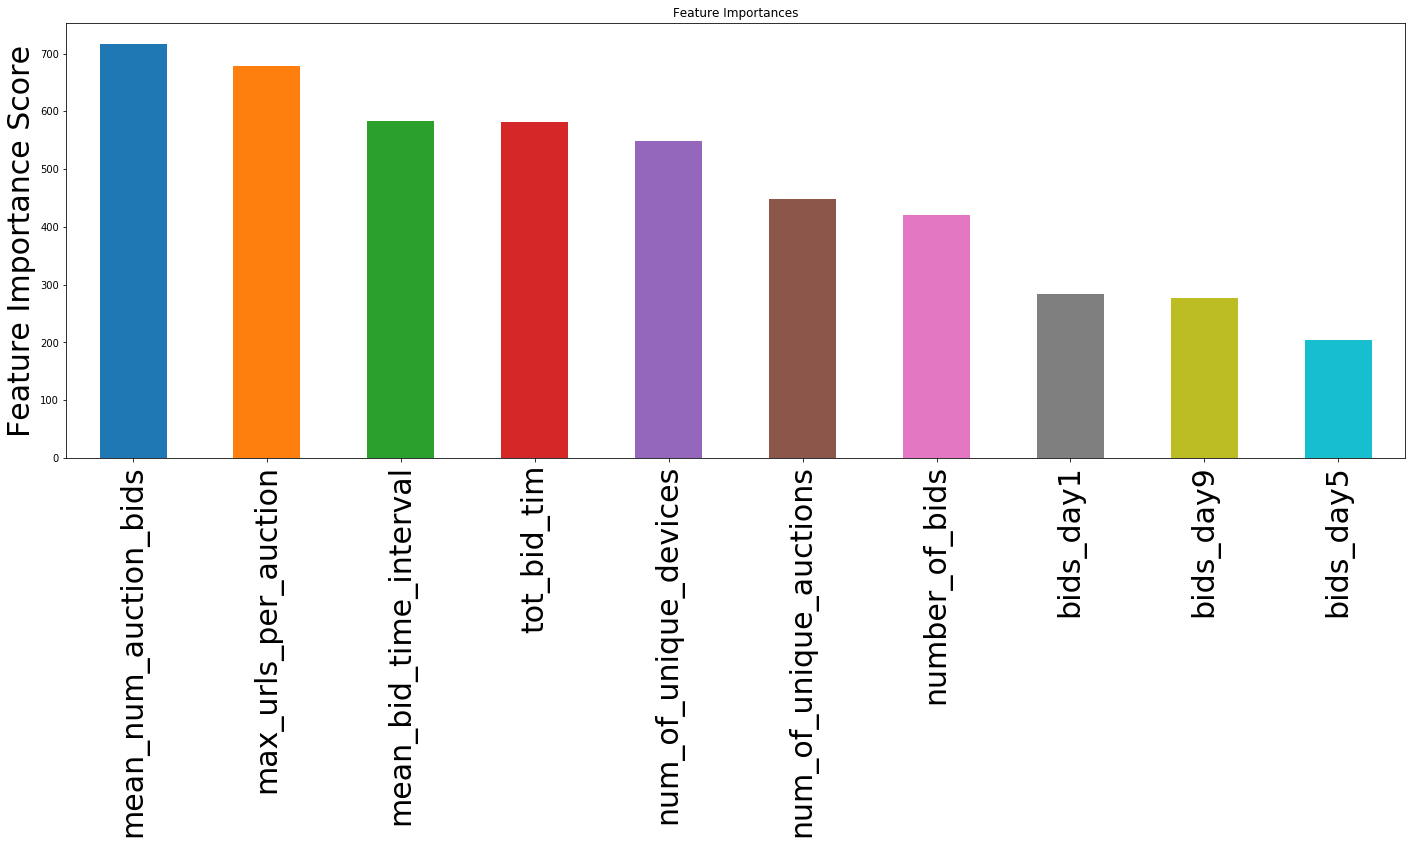

In [81]:
xgb6=XGBClassifier(learning_rate=0.01,n_estimators=1000,max_depth=8,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.75,objective='binary:logistic',scale_pos_weight=1,seed=20)

modelfit(xgb6,feature_set,label_set)

In [61]:
#training the predictor with such parameters
predictor=xgb4.fit(feature_set,label_set.values.ravel(),eval_metric='auc')

# Test prediction

## Test features generation

In [62]:
# try to do the prediction on test data
# read the test data
test_data=pd.read_csv('/Users/fx/.kaggle/competitions/facebook-recruiting-iv-human-or-bot/test.csv')
display(test_data.head())
print('The number of bidders in test.csv: ',len(test_data))
print('The number of test bidders that are also in bids.csv: ',bid_data.loc[bid_data['bidder_id'].isin(list(test_data['bidder_id']))]['bidder_id'].nunique())

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


The number of bidders in test.csv:  4700
The number of test bidders that are also in bids.csv:  4630


In [63]:
#construct the test bidder features
test_set=pd.DataFrame()
test_set['bidder_id']=test_data.loc[test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']

test_set.reset_index(inplace=True)
test_set=test_set.drop(['index'],axis=1)


In [64]:
#Mean number of bids for each auction by every bidder.
bidder_id_auction_df=pd.DataFrame(bid_data.groupby(['bidder_id','auction']).count().groupby(['bidder_id']).mean()).reset_index().rename(columns={'bid_id':'mean_num_auction_bids'})
test_set['mean_num_auction_bids']=bidder_id_auction_df.loc[bidder_id_auction_df['bidder_id'].isin(list(test_set['bidder_id']))].set_index(['bidder_id']).reindex(index=test_set['bidder_id']).reset_index()['mean_num_auction_bids']


In [65]:
#Mean number of time interval between each bid by every bidder.
bid_data['bid_time_interval']=bid_data.sort_values(by=['bidder_id','time']).groupby(['bidder_id'])['time'].diff().fillna(0).apply(lambda x:x/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)
#display(pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['bid_time_interval'].mean()).reindex(index=train_set['bidder_id']).reset_index())
test_set['mean_bid_time_interval']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id'])['bid_time_interval'].mean()).reindex(index=test_set['bidder_id']).reset_index()['bid_time_interval']


In [66]:
#Maximum number of diverse urls within all auctions by every bidder.
test_set['max_urls_per_auction']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id','auction'])['url'].nunique().groupby(['bidder_id']).max()).reindex(index=test_set['bidder_id']).reset_index()['url']


In [67]:
#Number of bids by every bidder.
test_set['number_of_bids']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id'])['bid_id'].count()).reindex(index=test_set['bidder_id']).reset_index()['bid_id']



In [68]:
#Number of unique auctions by every bidder.
test_set['num_of_unique_auctions']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id'])['auction'].nunique()).reindex(index=test_set['bidder_id']).reset_index()['auction']


In [69]:
#Number of unique devices by every bidder.
test_set['num_of_unique_devices']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id'])['device'].nunique()).reindex(index=test_set['bidder_id']).reset_index()['device']


In [70]:
#Bid time interval (last bid time step- first bid time step) within all 9 days by every bidder.
test_set['tot_bid_tim']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id'])['time'].apply(lambda x:(max(x)-min(x)))).reindex(index=test_set['bidder_id']).reset_index()['time']


In [71]:
#Bids number in 9 days by each bidder.
#bid_data['time_range_9']=pd.cut(bid_data['time'],9,include_lowest=True)
bid_in_ranges=pd.DataFrame(bid_data.groupby(['bidder_id','time_range_9']).count().fillna(0)['bid_id'])
bid_in_ranges=pd.DataFrame(pd.pivot_table(bid_in_ranges,values=['bid_id'],columns=['time_range_9'],index=['bidder_id']).to_records())
bid_in_ranges.columns=['bidder_id','bids_day1','bids_day2','bids_day3','bids_day4','bids_day5','bids_day6','bids_day7','bids_day8','bids_day9']



bid_in_ranges=bid_in_ranges.loc[bid_in_ranges['bidder_id'].isin(list(test_set['bidder_id']))].set_index(['bidder_id']).reindex(test_set['bidder_id']).reset_index()
bid_in_ranges=bid_in_ranges.drop(['bidder_id'],axis=1)
test_set=pd.concat([test_set,bid_in_ranges],axis=1)


In [73]:
#preprocessing of the features
test_set=test_set.drop(['bidder_id'],axis=1)
numerical=['mean_num_auction_bids','mean_bid_time_interval','max_urls_per_auction','number_of_bids','num_of_unique_auctions','num_of_unique_devices','tot_bid_tim','bids_day1','bids_day2','bids_day3','bids_day4','bids_day5','bids_day6','bids_day7','bids_day8','bids_day9']

#Skewed data preprocessed by log transformation
test_feature_set=test_set.copy()
test_feature_set[numerical]=test_feature_set[numerical].apply(lambda x:np.log(x+1))


#Data preprocessed by MinMaxScaler
scalar=MinMaxScaler()

test_feature_set[numerical]=scalar.fit_transform(test_feature_set[numerical])
display(test_feature_set.head())

test_feature_set.to_csv('test_feature_set_org.csv')

,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,bids_day5,bids_day6,bids_day7,bids_day8,bids_day9
0,0.023721,0.937210,0.049271,0.080770,0.102521,0.058406,0.996996,0.095795,0.0,0.0,0.0,0.096384,0.0,0.0,0.0,0.0
1,0.034337,0.967153,0.000000,0.061100,0.059971,0.099846,0.999468,0.095795,0.0,0.0,0.0,0.060812,0.0,0.0,0.0,0.0
2,0.015662,0.372055,0.049271,0.193682,0.298019,0.131989,0.825446,0.000000,0.0,0.0,0.0,0.253580,0.0,0.0,0.0,0.0
3,0.042981,0.649446,0.182772,0.379991,0.564667,0.534931,0.999681,0.361266,0.0,0.0,0.0,0.391806,0.0,0.0,0.0,0.0
4,0.011129,0.601087,0.000000,0.219041,0.347785,0.316505,0.922933,0.277115,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [74]:
# Predicting probability for test bidders
test_predprob_df=pd.DataFrame()
bug_test_df=pd.DataFrame()

test_predprob_df['bidder_id']=test_data.loc[test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
bug_test_df['bidder_id']=test_data.loc[~test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
bug_test_df['prediction']=-1

dtest_predprob=predictor.predict_proba(test_feature_set)[:,1]
print('Prediction done.')

test_predprob_df['prediction']=dtest_predprob


test_predprob_df=test_predprob_df.append(bug_test_df,ignore_index=True)


Prediction done.


In [75]:
# Output the submission file
test_predprob_df.to_csv('submission.csv',index=False)

At this point, the **LB private score is 0.91930 and the public score is 0.89269**.   

It seems that the parameter tuning won't be very useful in this case, the improvement in local auc score with 100 times CV is about 0.9260, hopefully by 100 times CV will help the local score more close to the LB.

# More feature engineering and data exploration

In [82]:
#Extract the bids records of robots(outcome>0.5)
bots=train_data[(train_data.outcome>0.5)]
print('Total number of robots record loaded: ',len(bots),'.')

bots_id=list(bots['bidder_id'])
bots_bids=bid_data.loc[bid_data['bidder_id'].isin(bots_id)]


#Extract the bids records of human(outcome<0.5)
human=train_data[(train_data.outcome<0.5)]
print('Total number of human record loaded: ',len(human),'.')

human_id=list(human['bidder_id'])
human_bids=bid_data.loc[bid_data['bidder_id'].isin(human_id)]


Total number of robots record loaded:  103 .
Total number of human record loaded:  1910 .


In [83]:
bots_bids['time_range']=pd.cut(bots_bids['time'],500,include_lowest=True)
human_bids['time_range']=pd.cut(human_bids['time'],500,include_lowest=True)

/Users/fx/anaconda/envs/dlnd/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/fx/anaconda/envs/dlnd/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### The effect of involving new features

From the former study, I noticed that the feature 'mean_num_auction_bids' is the most important feature in the classifier. Here I try to form a 2D feature space with 'mean_num_auction_bids' and the new feature that we try to implement, and check the 2D scatter plot to see if the new feature could distinguish well enough between human and robots.

#### Standard deviation of bids number change rate in time for each bidder

In [84]:
#Construct feature dataframe for bots and human, in order to compare
bots_features=pd.DataFrame(bots_bids.groupby(['bidder_id','time_range']).count().fillna(0).groupby('bidder_id').std()['bid_id']).rename(columns={'bid_id':'bids_rate_std'})
bots_features['mean_num_auction_bids']=bots_bids.groupby(['bidder_id','auction']).count().groupby('bidder_id').mean()['bid_id']


human_features=pd.DataFrame(human_bids.groupby(['bidder_id','time_range']).count().fillna(0).groupby('bidder_id').std()['bid_id']).rename(columns={'bid_id':'bids_rate_std'})
human_features['mean_num_auction_bids']=human_bids.groupby(['bidder_id','auction']).count().groupby('bidder_id').mean()['bid_id']


bots_features[['bids_rate_std','mean_num_auction_bids']]=bots_features[['bids_rate_std','mean_num_auction_bids']].apply(lambda x: np.log(x+1))
human_features[['bids_rate_std','mean_num_auction_bids']]=human_features[['bids_rate_std','mean_num_auction_bids']].apply(lambda x: np.log(x+1))


scalar=MinMaxScaler()

bots_features[['bids_rate_std','mean_num_auction_bids']]=scalar.fit_transform(bots_features[['bids_rate_std','mean_num_auction_bids']])
human_features[['bids_rate_std','mean_num_auction_bids']]=scalar.fit_transform(human_features[['bids_rate_std','mean_num_auction_bids']])


display(bots_features.head())
display(human_features.head())


,bids_rate_std,mean_num_auction_bids
bidder_id,,
022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.478600,0.482370
041d869edcadf595b90e3b5248903183pn754,0.279971,0.328156
060ac64ff78ae62e9bc697192cebea333760p,0.209777,0.297088
061690ceb6004807b7906968bf382dfcbve7y,0.207823,0.362510
06ddad46112881df154e3bda0e90fe880r57n,0.329589,0.534887


,bids_rate_std,mean_num_auction_bids
bidder_id,,
001068c415025a009fee375a12cff4fcnht8y,0.000000,0.000000
0030a2dd87ad2733e0873062e4f83954mkj86,0.000000,0.000000
00a0517965f18610417ee784a05f494d4dw6e,0.092127,0.059855
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0.006575,0.000000
01067975436d123f717ee5aba0dd4bbfa0937,0.195972,0.449056


Text(0.5,1,'Scatter plot in 2D features space')

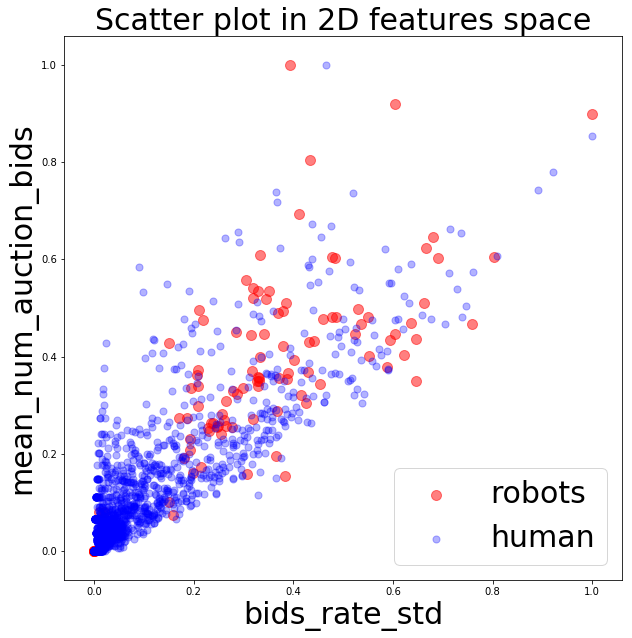

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(bots_features['bids_rate_std'],bots_features['mean_num_auction_bids'],c='red',s=100,alpha=0.5,label='robots')
plt.scatter(human_features['bids_rate_std'],human_features['mean_num_auction_bids'],c='blue',s=50,alpha=0.3,label='human')
plt.xlabel('bids_rate_std',fontsize=30)
plt.ylabel('mean_num_auction_bids',fontsize=30)
plt.legend(fontsize=30)
plt.title('Scatter plot in 2D features space',fontsize=30)


From this figure, it appears that the new feature 'bids_rate_std' can help distinguish the robots (red circles that are mostly distributed in the right up corner) from the human (blue circles that are mostly distributed in the left down corner) in its dimension.

#### Standard deviation of bids number of each auction

In [86]:
bots_features['std_num_auction_bids']=bots_bids.groupby(['bidder_id','auction']).count().groupby(['bidder_id']).std()['bid_id'].fillna(0)
human_features['std_num_auction_bids']=human_bids.groupby(['bidder_id','auction']).count().groupby(['bidder_id']).std()['bid_id'].fillna(0)

bots_features[['std_num_auction_bids']]=bots_features[['std_num_auction_bids']].apply(lambda x: np.log(x+1))
human_features[['std_num_auction_bids']]=human_features[['std_num_auction_bids']].apply(lambda x: np.log(x+1))


scalar=MinMaxScaler()

bots_features[['std_num_auction_bids']]=scalar.fit_transform(bots_features[['std_num_auction_bids']])
human_features[['std_num_auction_bids']]=scalar.fit_transform(human_features[['std_num_auction_bids']])

display(bots_features.head())
display(human_features.head())



,bids_rate_std,mean_num_auction_bids,std_num_auction_bids
bidder_id,,,
022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.478600,0.482370,0.473755
041d869edcadf595b90e3b5248903183pn754,0.279971,0.328156,0.411342
060ac64ff78ae62e9bc697192cebea333760p,0.209777,0.297088,0.323325
061690ceb6004807b7906968bf382dfcbve7y,0.207823,0.362510,0.385844
06ddad46112881df154e3bda0e90fe880r57n,0.329589,0.534887,0.281494


,bids_rate_std,mean_num_auction_bids,std_num_auction_bids
bidder_id,,,
001068c415025a009fee375a12cff4fcnht8y,0.000000,0.000000,0.000000
0030a2dd87ad2733e0873062e4f83954mkj86,0.000000,0.000000,0.000000
00a0517965f18610417ee784a05f494d4dw6e,0.092127,0.059855,0.117643
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0.006575,0.000000,0.000000
01067975436d123f717ee5aba0dd4bbfa0937,0.195972,0.449056,0.645854


Text(0.5,1,'Scatter plot in 2D features space')

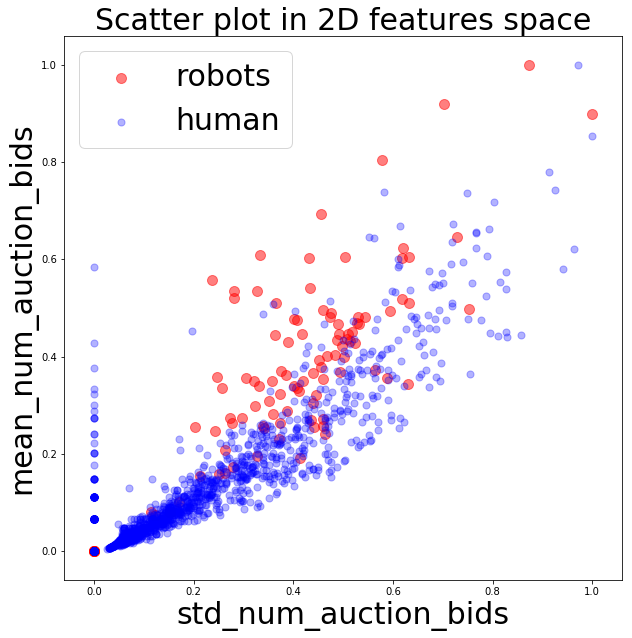

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(bots_features['std_num_auction_bids'],bots_features['mean_num_auction_bids'],c='red',s=100,alpha=0.5,label='robots')
plt.scatter(human_features['std_num_auction_bids'],human_features['mean_num_auction_bids'],c='blue',s=50,alpha=0.3,label='human')
plt.xlabel('std_num_auction_bids',fontsize=30)
plt.ylabel('mean_num_auction_bids',fontsize=30)
plt.legend(fontsize=30)
plt.title('Scatter plot in 2D features space',fontsize=30)

It appears to have a similar distinguishable outcome for this new feature.

#### Mean value of different auctions started within one short time intervals

- The robots may start several different auctions between timepoints in vicinity.

In [88]:
bots_features['Mean_diff_auctions_per_tim_interval']=bots_bids.groupby(['bidder_id','time_range'])['auction'].nunique().groupby('bidder_id').mean()
human_features['Mean_diff_auctions_per_tim_interval']=human_bids.groupby(['bidder_id','time_range'])['auction'].nunique().groupby('bidder_id').mean()

display(bots_features.head())
display(human_features.head())



,bids_rate_std,mean_num_auction_bids,std_num_auction_bids,Mean_diff_auctions_per_tim_interval
bidder_id,,,,
022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.478600,0.482370,0.473755,14.285714
041d869edcadf595b90e3b5248903183pn754,0.279971,0.328156,0.411342,4.989011
060ac64ff78ae62e9bc697192cebea333760p,0.209777,0.297088,0.323325,2.913043
061690ceb6004807b7906968bf382dfcbve7y,0.207823,0.362510,0.385844,3.214286
06ddad46112881df154e3bda0e90fe880r57n,0.329589,0.534887,0.281494,6.000000


,bids_rate_std,mean_num_auction_bids,std_num_auction_bids,Mean_diff_auctions_per_tim_interval
bidder_id,,,,
001068c415025a009fee375a12cff4fcnht8y,0.000000,0.000000,0.000000,1.000000
0030a2dd87ad2733e0873062e4f83954mkj86,0.000000,0.000000,0.000000,1.000000
00a0517965f18610417ee784a05f494d4dw6e,0.092127,0.059855,0.117643,2.148148
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0.006575,0.000000,0.000000,1.500000
01067975436d123f717ee5aba0dd4bbfa0937,0.195972,0.449056,0.645854,1.488889


Text(0.5,1,'Scatter plot in 2D features space')

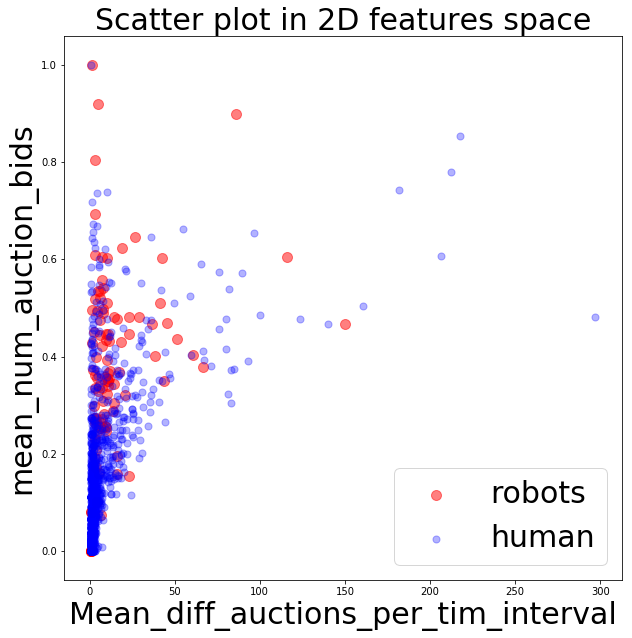

In [89]:
plt.figure(figsize=(10,10))
plt.scatter(bots_features['Mean_diff_auctions_per_tim_interval'],bots_features['mean_num_auction_bids'],c='red',s=100,alpha=0.5,label='robots')
plt.scatter(human_features['Mean_diff_auctions_per_tim_interval'],human_features['mean_num_auction_bids'],c='blue',s=50,alpha=0.3,label='human')
plt.xlabel('Mean_diff_auctions_per_tim_interval',fontsize=30)
plt.ylabel('mean_num_auction_bids',fontsize=30)
plt.legend(fontsize=30)
plt.title('Scatter plot in 2D features space',fontsize=30)

Text(0.5,1,'')

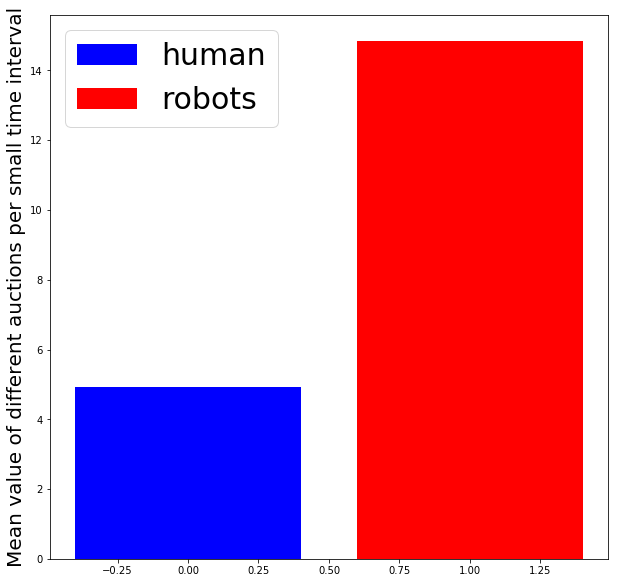

In [90]:
plt.figure(figsize=(10,10))
plt.bar([0],[human_features['Mean_diff_auctions_per_tim_interval'].mean()],color='blue',label='human')
plt.bar([1],[bots_features['Mean_diff_auctions_per_tim_interval'].mean()],color='red',label='robots')
plt.xlabel('',fontsize=30)
plt.ylabel('Mean value of different auctions per small time interval',fontsize=20)
plt.legend(fontsize=30)
plt.title('',fontsize=30)

#### Bid time characterisitics between robots and human

- Consider that robot users are much more willing to win the bid, therefore they may have the most last bid percentage within theirs own auctions.



In [91]:
last_bid_auction=pd.DataFrame(bid_data.sort_values(by=['auction','time']).groupby('auction')['time','bidder_id'].agg(lambda x: x.iloc[-1]))

display(last_bid_auction.head())


,time,bidder_id
auction,,
00270,9709212894736842,9655ccc7c0c193f1549475f02c54dce45kjw7
008vv,9760397157894736,cffb5f3c1f4ca815d0f643fcb2f2f316beod4
00cwr,9698636578947368,5b18da77c00230f5a45e544a1a8a38624cf4p
00do0,9759865210526315,c4856fd5abe8f6d6dea36ca2fec444faauos8
00hjy,9772723842105263,7c0ab2117fe57b763e28401c4330cfceqd7gq


In [92]:
bidder_comp_last_bid=pd.DataFrame(last_bid_auction.groupby('bidder_id').count()).rename(columns={'time':'comp_last_bid'})
display(bidder_comp_last_bid.head())

,comp_last_bid
bidder_id,
0053b78cde37c4384a20d2da9aa4272aym4pb,6
00b519ec8ed5e370328451379bb708a306eoj,1
00e0f614d9dd32dd27f6080f472d2934emlos,3
01067975436d123f717ee5aba0dd4bbfa0937,1
0113d101ec6aabd354adac645a1ec3e82ln88,1


In [93]:
tot_auction=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(bidder_comp_last_bid.index.values))].groupby('bidder_id')['auction'].nunique())
display(tot_auction.head())

bidder_comp_last_bid['comp_last_bid']=bidder_comp_last_bid['comp_last_bid']#/tot_auction['auction']
display(bidder_comp_last_bid.head())

,auction
bidder_id,
0053b78cde37c4384a20d2da9aa4272aym4pb,408
00b519ec8ed5e370328451379bb708a306eoj,291
00e0f614d9dd32dd27f6080f472d2934emlos,203
01067975436d123f717ee5aba0dd4bbfa0937,17
0113d101ec6aabd354adac645a1ec3e82ln88,102


,comp_last_bid
bidder_id,
0053b78cde37c4384a20d2da9aa4272aym4pb,6
00b519ec8ed5e370328451379bb708a306eoj,1
00e0f614d9dd32dd27f6080f472d2934emlos,3
01067975436d123f717ee5aba0dd4bbfa0937,1
0113d101ec6aabd354adac645a1ec3e82ln88,1


In [94]:
bots_features['comp_last_bid']=bidder_comp_last_bid['comp_last_bid']
bots_features['comp_last_bid']=bots_features['comp_last_bid'].fillna(0)


human_features['comp_last_bid']=bidder_comp_last_bid['comp_last_bid']
human_features['comp_last_bid']=human_features['comp_last_bid'].fillna(0)    

display(bots_features.head())
display(human_features.head())
                                                                                               

,bids_rate_std,mean_num_auction_bids,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,comp_last_bid
bidder_id,,,,,
022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.478600,0.482370,0.473755,14.285714,4.0
041d869edcadf595b90e3b5248903183pn754,0.279971,0.328156,0.411342,4.989011,1.0
060ac64ff78ae62e9bc697192cebea333760p,0.209777,0.297088,0.323325,2.913043,0.0
061690ceb6004807b7906968bf382dfcbve7y,0.207823,0.362510,0.385844,3.214286,0.0
06ddad46112881df154e3bda0e90fe880r57n,0.329589,0.534887,0.281494,6.000000,0.0


,bids_rate_std,mean_num_auction_bids,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,comp_last_bid
bidder_id,,,,,
001068c415025a009fee375a12cff4fcnht8y,0.000000,0.000000,0.000000,1.000000,0.0
0030a2dd87ad2733e0873062e4f83954mkj86,0.000000,0.000000,0.000000,1.000000,0.0
00a0517965f18610417ee784a05f494d4dw6e,0.092127,0.059855,0.117643,2.148148,0.0
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0.006575,0.000000,0.000000,1.500000,0.0
01067975436d123f717ee5aba0dd4bbfa0937,0.195972,0.449056,0.645854,1.488889,1.0


In [95]:
bots_features[['comp_last_bid']]=bots_features[['comp_last_bid']].apply(lambda x: np.log(x+1))
human_features[['comp_last_bid']]=human_features[['comp_last_bid']].apply(lambda x: np.log(x+1))


scalar=MinMaxScaler()

bots_features[['comp_last_bid']]=scalar.fit_transform(bots_features[['comp_last_bid']])
human_features[['comp_last_bid']]=scalar.fit_transform(human_features[['comp_last_bid']])

display(bots_features.head())
display(human_features.head())

,bids_rate_std,mean_num_auction_bids,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,comp_last_bid
bidder_id,,,,,
022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.478600,0.482370,0.473755,14.285714,0.30552
041d869edcadf595b90e3b5248903183pn754,0.279971,0.328156,0.411342,4.989011,0.13158
060ac64ff78ae62e9bc697192cebea333760p,0.209777,0.297088,0.323325,2.913043,0.00000
061690ceb6004807b7906968bf382dfcbve7y,0.207823,0.362510,0.385844,3.214286,0.00000
06ddad46112881df154e3bda0e90fe880r57n,0.329589,0.534887,0.281494,6.000000,0.00000


,bids_rate_std,mean_num_auction_bids,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,comp_last_bid
bidder_id,,,,,
001068c415025a009fee375a12cff4fcnht8y,0.000000,0.000000,0.000000,1.000000,0.000000
0030a2dd87ad2733e0873062e4f83954mkj86,0.000000,0.000000,0.000000,1.000000,0.000000
00a0517965f18610417ee784a05f494d4dw6e,0.092127,0.059855,0.117643,2.148148,0.000000
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0.006575,0.000000,0.000000,1.500000,0.000000
01067975436d123f717ee5aba0dd4bbfa0937,0.195972,0.449056,0.645854,1.488889,0.111973


Text(0.5,1,'Scatter plot in 2D features space')

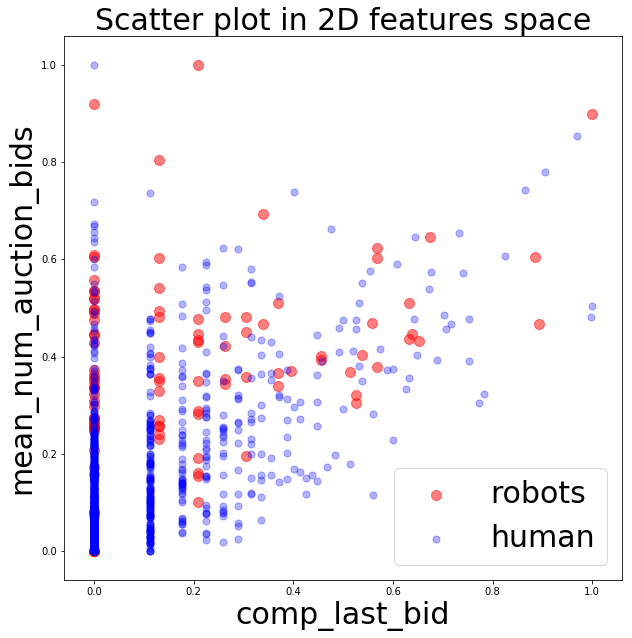

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(bots_features['comp_last_bid'],bots_features['mean_num_auction_bids'],c='red',s=100,alpha=0.5,label='robots')
plt.scatter(human_features['comp_last_bid'],human_features['mean_num_auction_bids'],c='blue',s=50,alpha=0.3,label='human')
plt.xlabel('comp_last_bid',fontsize=30)
plt.ylabel('mean_num_auction_bids',fontsize=30)
plt.legend(fontsize=30)
plt.title('Scatter plot in 2D features space',fontsize=30)

It seems that the percentages of the last bid for every own bidders won't distinguish so obviously the robots and human. We can still try to substitute this feature to see what happens. 

As we can see from the figure below, the mean value of robots bid winning rate is obviously higher than the human mean value, thus this feature may be worth adding afterall.

Text(0.5,1,'')

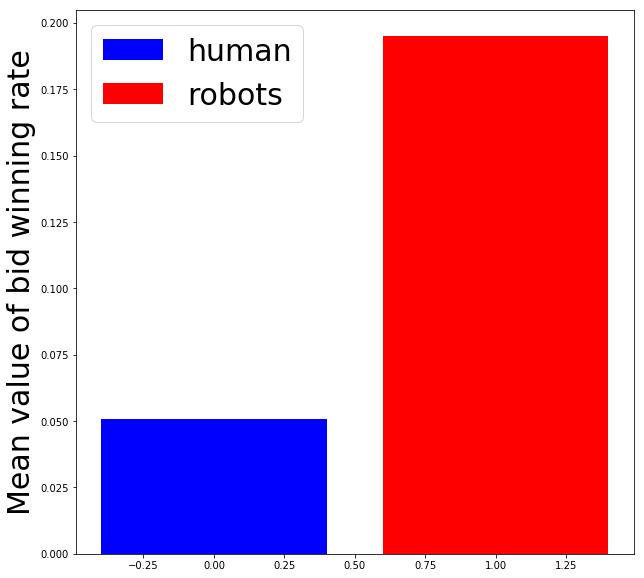

In [97]:
plt.figure(figsize=(10,10))
plt.bar([0],[human_features['comp_last_bid'].mean()],color='blue',label='human')
plt.bar([1],[bots_features['comp_last_bid'].mean()],color='red',label='robots')
plt.xlabel('',fontsize=30)
plt.ylabel('Mean value of bid winning rate',fontsize=30)
plt.legend(fontsize=30)
plt.title('',fontsize=30)

# Adding features in the feature set and train

In [98]:
#Adding the time interval column in the bid_data, about 25min for each interval
bid_data['time_range']=pd.cut(bid_data['time'],500,include_lowest=True)

#Construct the train_set
train_set=pd.DataFrame()
train_set['bidder_id']=train_data.loc[train_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']

train_set.reset_index(inplace=True)
train_set=train_set.drop(['index'],axis=1)

#Standard deviation of bids number change rate in time for each bidder
train_set['bids_rate_std']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id','time_range']).count().fillna(0).groupby('bidder_id').std()['bid_id']).reindex(index=train_set['bidder_id']).reset_index()['bid_id']


#Standard deviation of bids number of each auction
train_set['std_num_auction_bids']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id','auction']).count().groupby(['bidder_id']).std()['bid_id'].fillna(0)).reindex(index=train_set['bidder_id']).reset_index()['bid_id']


#Mean value of different auctions started within one short time intervals
train_set['Mean_diff_auctions_per_tim_interval']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id','time_range'])['auction'].nunique().groupby('bidder_id').mean()).reindex(index=train_set['bidder_id']).reset_index()['auction']

#Last bid number
train_set.set_index('bidder_id',inplace=True)
train_set['comp_last_bid']=bidder_comp_last_bid['comp_last_bid']
train_set['comp_last_bid']=train_set['comp_last_bid'].fillna(0)
train_set.reset_index(inplace=True)

display(train_set.head())


,bidder_id,bids_rate_std,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,comp_last_bid
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.286111,0.594089,1.294118,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.077304,0.000000,1.000000,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.089173,0.000000,1.000000,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.044721,0.000000,1.000000,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,2.139873,9.230470,2.769231,0.0


In [99]:
#preprocessing of the features
train_set=train_set.drop(['bidder_id'],axis=1)
numerical=['bids_rate_std','std_num_auction_bids','Mean_diff_auctions_per_tim_interval','comp_last_bid']

#Skewed data preprocessed by log transformation
more_feature_set=train_set.copy()
more_feature_set[numerical]=more_feature_set[numerical].apply(lambda x:np.log(x+1))


#Data preprocessed by MinMaxScaler
scalar=MinMaxScaler()

more_feature_set[numerical]=scalar.fit_transform(more_feature_set[numerical])

feature_set=pd.concat([feature_set,more_feature_set],axis=1)
display(feature_set.head())


#save the feature set and label set
feature_set.to_csv('feature_v1.csv')
label_set.to_csv('label.csv')

,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_auctions,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,bids_day5,bids_day6,bids_day7,bids_day8,bids_day9,bids_rate_std,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,comp_last_bid
0,0.024708,0.653853,0.000000,0.202726,0.336039,0.280729,0.944575,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.264532,0.026545,0.060385,0.027421,0.0
1,0.111102,0.765712,0.051787,0.055635,0.000000,0.056492,0.922417,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.113928,0.003922,0.000000,0.000000,0.0
2,0.000000,0.750278,0.000000,0.073545,0.136770,0.056492,0.925498,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.132266,0.005321,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.05829,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.216891,0.494250,0.306267,0.349688,0.370909,0.459196,0.941690,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.415005,0.140525,0.301131,0.126655,0.0


# Retuning the model with new feature set

Optimum number of estimators is 77
Mean AUC score is 0.924770


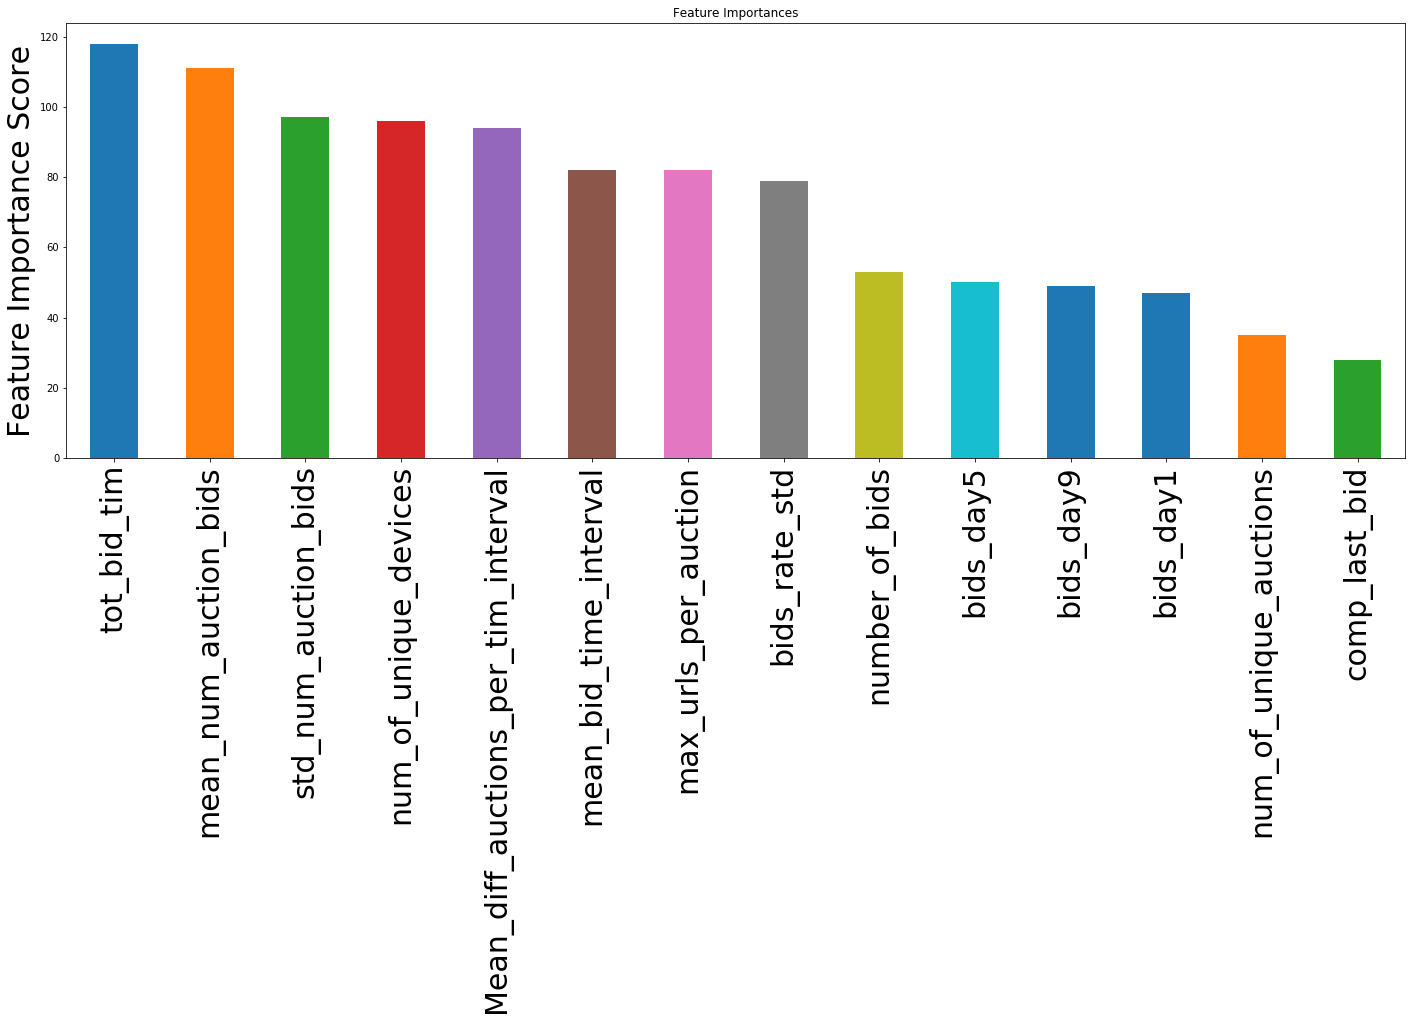

In [100]:
#xgb1=XGBClassifier(learning_rate=0.05,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=10)

modelfit(xgb1,feature_set,label_set)

Optimum number of estimators is 77
Mean AUC score is 0.925237


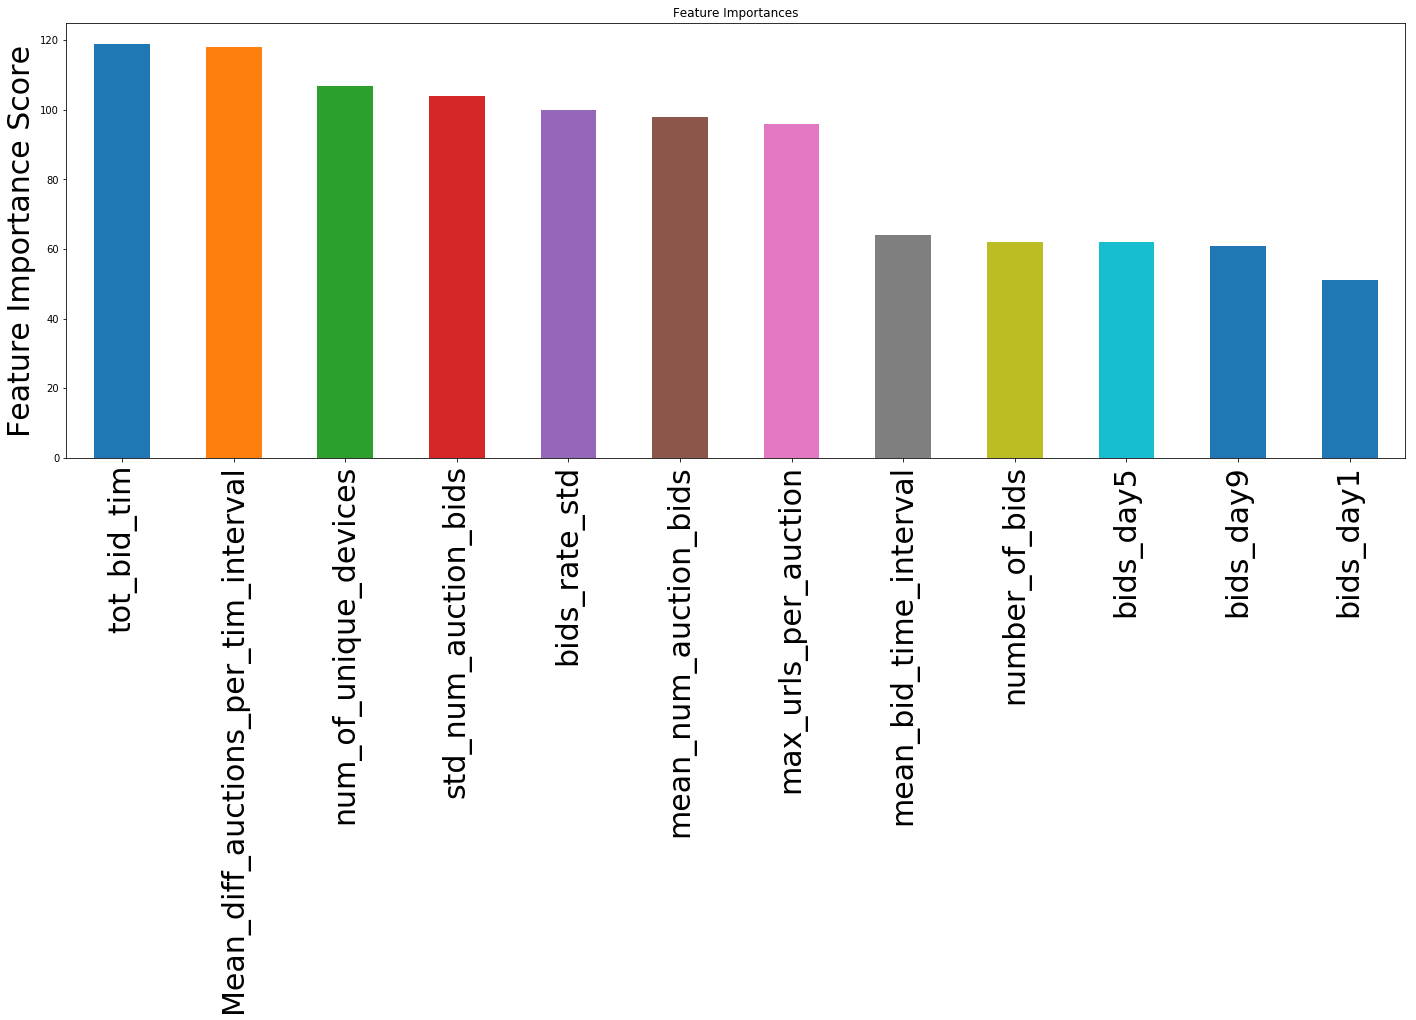

In [102]:
feature_set_drop=feature_set.drop(columns=['comp_last_bid','num_of_unique_auctions'])
modelfit(xgb1,feature_set_drop,label_set)

In [108]:
display(pd.DataFrame(bots_bids.groupby(['bidder_id'])['bid_id'].count()).sort_values(by=['bid_id']).rename(columns={'bid_id':'bid_num'}).head(10))

,bid_num
bidder_id,
bd0071b98d9479130e5c053a244fe6f1muj8h,1
91c749114e26abdb9a4536169f9b4580huern,1
74a35c4376559c911fdb5e9cfb78c5e4btqew,1
f35082c6d72f1f1be3dd23f949db1f577t6wd,1
7fab82fa5eaea6a44eb743bc4bf356b3tarle,1
efc61ad6db17265a4bac85f77b154ef414tpp,4
238808859d7752579a415e89a395500fh2o65,10
0f3ee77a46dd5a09ad20b7c3e54ec614sbpvb,137
40e00fd204d0ce97110032bfc47f423d0bgrd,148


Optimum number of estimators is 77
Mean AUC score is 0.936651


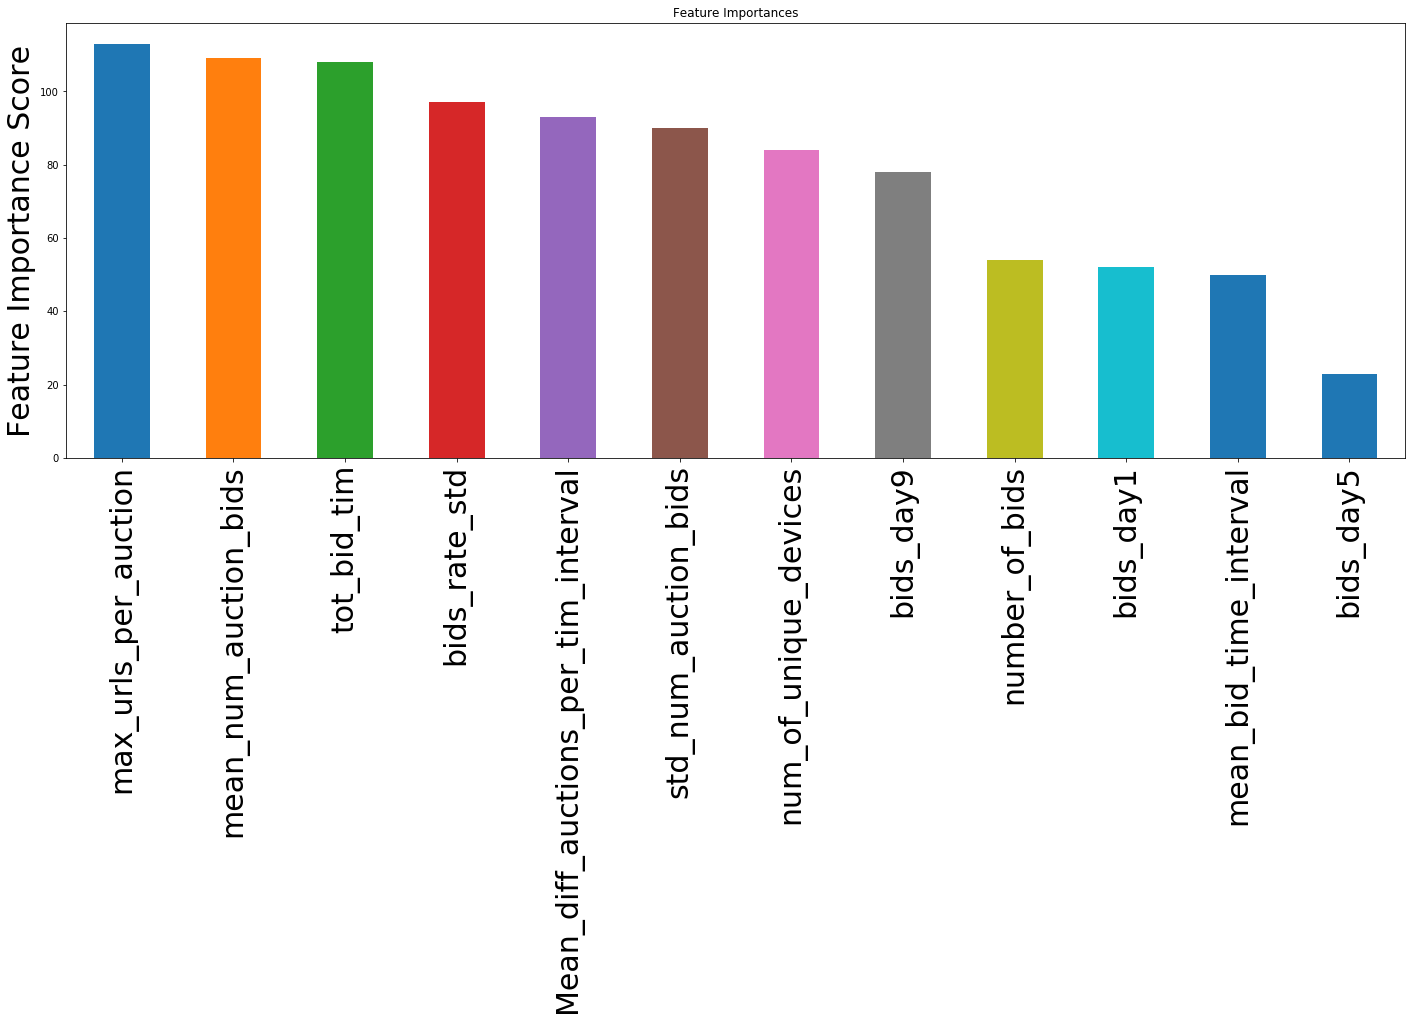

In [103]:
#Eliminating the one bid robots.
train_set=pd.DataFrame()
train_set['bidder_id']=train_data.loc[train_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']

train_set.reset_index(inplace=True)
train_set=train_set.drop(['index'],axis=1)

outliers=['bd0071b98d9479130e5c053a244fe6f1muj8h','91c749114e26abdb9a4536169f9b4580huern','74a35c4376559c911fdb5e9cfb78c5e4btqew','f35082c6d72f1f1be3dd23f949db1f577t6wd','7fab82fa5eaea6a44eb743bc4bf356b3tarle']
outliers_index=train_set.index[train_set['bidder_id'].isin(outliers)].tolist()

feature_set_drop=feature_set_drop.drop(feature_set_drop.index[outliers_index])
label_set_drop=label_set.drop(label_set.index[outliers_index])


modelfit(xgb1,feature_set_drop,label_set_drop)

In [111]:
#Save the current feature set
feature_set_drop.to_csv('feature_v1_no_1bid_bots.csv')
label_set_drop.to_csv('label_no_1bid_bots.csv')

In [156]:
#Fit the model
xgb1=XGBClassifier(learning_rate=0.05,n_estimators=101,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',scale_pos_weight=19.19,seed=10)

predictor=xgb1.fit(feature_set_drop,label_set_drop.values.ravel(),eval_metric='auc')

In [105]:
# try to do the prediction on test data
# read the test data
test_data=pd.read_csv('/Users/fx/.kaggle/competitions/facebook-recruiting-iv-human-or-bot/test.csv')
display(test_data.head())
print('The number of bidders in test.csv: ',len(test_data))
print('The number of test bidders that are also in bids.csv: ',bid_data.loc[bid_data['bidder_id'].isin(list(test_data['bidder_id']))]['bidder_id'].nunique())

#construct the test bidder features
test_set=pd.DataFrame()
test_set['bidder_id']=test_data.loc[test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']

test_set.reset_index(inplace=True)
test_set=test_set.drop(['index'],axis=1)

#Standard deviation of bids number change rate in time for each bidder
test_set['bids_rate_std']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id','time_range']).count().fillna(0).groupby('bidder_id').std()['bid_id']).reindex(index=test_set['bidder_id']).reset_index()['bid_id']


#Standard deviation of bids number of each auction
test_set['std_num_auction_bids']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id','auction']).count().groupby(['bidder_id']).std()['bid_id'].fillna(0)).reindex(index=test_set['bidder_id']).reset_index()['bid_id']


#Mean value of different auctions started within one short time intervals
test_set['Mean_diff_auctions_per_tim_interval']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id','time_range'])['auction'].nunique().groupby('bidder_id').mean()).reindex(index=test_set['bidder_id']).reset_index()['auction']

#Last bid number
test_set.set_index('bidder_id',inplace=True)
test_set['comp_last_bid']=bidder_comp_last_bid['comp_last_bid']
test_set['comp_last_bid']=test_set['comp_last_bid'].fillna(0)
test_set.reset_index(inplace=True)


print('Number of bidders info for testing:',len(test_set))
display(test_set.head())

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


The number of bidders in test.csv:  4700
The number of test bidders that are also in bids.csv:  4630
Number of bidders info for testing: 4630


,bidder_id,bids_rate_std,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,comp_last_bid
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,0.089173,0.577350,1.000000,0.0
1,a921612b85a1494456e74c09393ccb65ylp4y,0.099920,0.707107,1.000000,0.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,0.716848,0.425815,7.500000,0.0
3,eaf0ed0afc9689779417274b4791726cn5udi,0.954046,2.012942,1.926471,0.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0.518093,0.366348,4.400000,0.0


In [106]:
#preprocessing of the features
test_set=test_set.drop(['bidder_id'],axis=1)
numerical=['bids_rate_std','std_num_auction_bids','Mean_diff_auctions_per_tim_interval','comp_last_bid']

#Skewed data preprocessed by log transformation
test_more_feature_set=test_set.copy()
test_more_feature_set[numerical]=test_more_feature_set[numerical].apply(lambda x:np.log(x+1))


#Data preprocessed by MinMaxScaler
scalar=MinMaxScaler()

test_more_feature_set[numerical]=scalar.fit_transform(test_more_feature_set[numerical])

test_feature_set=pd.concat([test_feature_set,test_more_feature_set],axis=1)

test_feature_set_drop=test_feature_set.drop(columns=['comp_last_bid','num_of_unique_auctions'])
display(test_feature_set_drop.head())


#save the feature set and label set
test_feature_set_drop.to_csv('test_feature_v1.csv')


,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,bids_day5,bids_day6,bids_day7,bids_day8,bids_day9,bids_rate_std,std_num_auction_bids,Mean_diff_auctions_per_tim_interval
0,0.023721,0.937210,0.049271,0.080770,0.058406,0.996996,0.095795,0.0,0.0,0.0,0.096384,0.0,0.0,0.0,0.0,0.006263,0.053507,0.000000
1,0.034337,0.967153,0.000000,0.061100,0.099846,0.999468,0.095795,0.0,0.0,0.0,0.060812,0.0,0.0,0.0,0.0,0.007739,0.062788,0.000000
2,0.015662,0.372055,0.049271,0.193682,0.131989,0.825446,0.000000,0.0,0.0,0.0,0.253580,0.0,0.0,0.0,0.0,0.074662,0.041649,0.310243
3,0.042981,0.649446,0.182772,0.379991,0.534931,0.999681,0.361266,0.0,0.0,0.0,0.391806,0.0,0.0,0.0,0.0,0.094114,0.129489,0.081618
4,0.011129,0.601087,0.000000,0.219041,0.316505,0.922933,0.277115,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.056170,0.036647,0.212969


In [157]:
# Predicting probability for test bidders
test_predprob_df=pd.DataFrame()
bug_test_df=pd.DataFrame()

test_predprob_df['bidder_id']=test_data.loc[test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
bug_test_df['bidder_id']=test_data.loc[~test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
bug_test_df['prediction']=-1

dtest_predprob=predictor.predict_proba(test_feature_set_drop)[:,1]

test_predprob_df['prediction']=dtest_predprob


test_predprob_df=test_predprob_df.append(bug_test_df,ignore_index=True)

# Output the submission file
test_predprob_df.to_csv('submission_2_spw.csv',index=False)

In [159]:
def pred(predictor, test_set, output):
    test_predprob_df=pd.DataFrame()
    bug_test_df=pd.DataFrame()

    test_predprob_df['bidder_id']=test_data.loc[test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
    bug_test_df['bidder_id']=test_data.loc[~test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
    bug_test_df['prediction']=-1

    dtest_predprob=predictor.predict_proba(test_set)[:,1]

    test_predprob_df['prediction']=dtest_predprob


    test_predprob_df=test_predprob_df.append(bug_test_df,ignore_index=True)

    # Output the submission file
    test_predprob_df.to_csv(output,index=False)

- This time, I have the **LB private score 0.92285 and the public score 0.89955**. Which appears to have a positive improvement, this improvement is mainly due to the elimination of the 5 robots who did just 1 bid. 


- Good news is that the local auc score and the LB score head in the same direction, which means the improvement of the local score has more fidelity, and the local overfitting is less severe by doing 100 times CV.


- Feature creation is still not totally succesful, I even have to remove some features to save the descreasement of the local auc score. 


- Some of the new features added seems to play a relatively important role, but apparently more features should be explored and ensembling of more models should be considered.

# More thoughts

In order to improve the prediction performance, I am thinking of two things:

- Explore a little more features associated with the bid times, since the feature importances always shows that the feature with bid time generally have more contributions for the model.
- Try to ensemble other models.


## Exploring more features

- Number of unique auctions, urls, ips.
- Number of simultaneous bids.


In [112]:
display(bid_data.head())

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,bid_time_interval,time_range_9,time_range
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,0.0,"(9.75722205848e+15, 9.77288521053e+15]","(9.75907031042e+15, 9.75935224716e+15]"
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,0.0,"(9.75722205848e+15, 9.77288521053e+15]","(9.75907031042e+15, 9.75935224716e+15]"
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,0.0,"(9.75722205848e+15, 9.77288521053e+15]","(9.75907031042e+15, 9.75935224716e+15]"
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,0.0,"(9.75722205848e+15, 9.77288521053e+15]","(9.75907031042e+15, 9.75935224716e+15]"
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,0.0,"(9.75722205848e+15, 9.77288521053e+15]","(9.75907031042e+15, 9.75935224716e+15]"


In [196]:
train_set=pd.DataFrame()
train_set['bidder_id']=train_data.loc[train_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']

train_set.reset_index(inplace=True)
train_set=train_set.drop(['index'],axis=1)

# Number of unique auctions,urls,ips
train_set['num_of_unique_auction']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['auction'].nunique()).reindex(index=train_set['bidder_id']).reset_index()['auction']
train_set['num_of_unique_url']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['url'].nunique()).reindex(index=train_set['bidder_id']).reset_index()['url']
train_set['num_of_unique_ip']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id'])['ip'].nunique()).reindex(index=train_set['bidder_id']).reset_index()['ip']


# Number of simultaneous bids 
df=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(train_set['bidder_id']))].groupby(['bidder_id','time']).count()['bid_id'])
train_set['num_of_simul_bid']=pd.DataFrame(df[df['bid_id']>1].groupby(['bidder_id']).count()).reindex(index=train_set['bidder_id']).reset_index().fillna(0)['bid_id']


display(train_set.head())

,bidder_id,num_of_unique_auction,num_of_unique_url,num_of_unique_ip,num_of_simul_bid
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,18,1,20,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,1,2,3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,4,2,4,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,1,1,1,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,23,91,123,0.0


In [197]:
#Locating the 1 bid robots
outliers=['bd0071b98d9479130e5c053a244fe6f1muj8h','91c749114e26abdb9a4536169f9b4580huern','74a35c4376559c911fdb5e9cfb78c5e4btqew','f35082c6d72f1f1be3dd23f949db1f577t6wd','7fab82fa5eaea6a44eb743bc4bf356b3tarle']
outliers_index=train_set.index[train_set['bidder_id'].isin(outliers)].tolist()


#preprocessing of the features
train_set=train_set.drop(['bidder_id'],axis=1)
numerical=['num_of_unique_auction','num_of_unique_url','num_of_unique_ip','num_of_simul_bid']

#Skewed data preprocessed by log transformation
more_feature_set=train_set.copy()
more_feature_set[numerical]=more_feature_set[numerical].apply(lambda x:np.log(x+1))


#Data preprocessed by MinMaxScaler
scalar=MinMaxScaler()

more_feature_set[numerical]=scalar.fit_transform(more_feature_set[numerical])

#Eliminating the 1 bid robots
more_feature_set=more_feature_set.drop(more_feature_set.index[outliers_index])

#Reading the former feature set
feature_set=pd.read_csv('feature_v1_no_1bid_bots.csv',index_col=0)

#Concating the feature sets
feature_set=pd.concat([feature_set,more_feature_set],axis=1)
display(feature_set.head())


#save the feature set
#feature_set.to_csv('feature_v2_no_1bid_bots.csv')

#Reading the label set
#label_set.read_csv('label_no_1bid_bots.csv')

,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,...,bids_day7,bids_day8,bids_day9,bids_rate_std,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,num_of_unique_auction,num_of_unique_url,num_of_unique_ip,num_of_simul_bid
0,0.024708,0.653853,0.000000,0.202726,0.280729,0.944575,0.0,0.0,0.0,0.0,...,0.0,0.0,0.264532,0.026545,0.060385,0.027421,0.336039,0.000000,0.215083,0.0
1,0.111102,0.765712,0.051787,0.055635,0.056492,0.922417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.113928,0.003922,0.000000,0.000000,0.000000,0.038202,0.063403,0.0
2,0.000000,0.750278,0.000000,0.073545,0.056492,0.925498,0.0,0.0,0.0,0.0,...,0.0,0.0,0.132266,0.005321,0.000000,0.000000,0.136770,0.038202,0.083814,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.216891,0.494250,0.306267,0.349688,0.459196,0.941690,0.0,0.0,0.0,0.0,...,0.0,0.0,0.415005,0.140525,0.301131,0.126655,0.370909,0.360726,0.377515,0.0


## Training models with these features

Mean AUC score is 0.929802


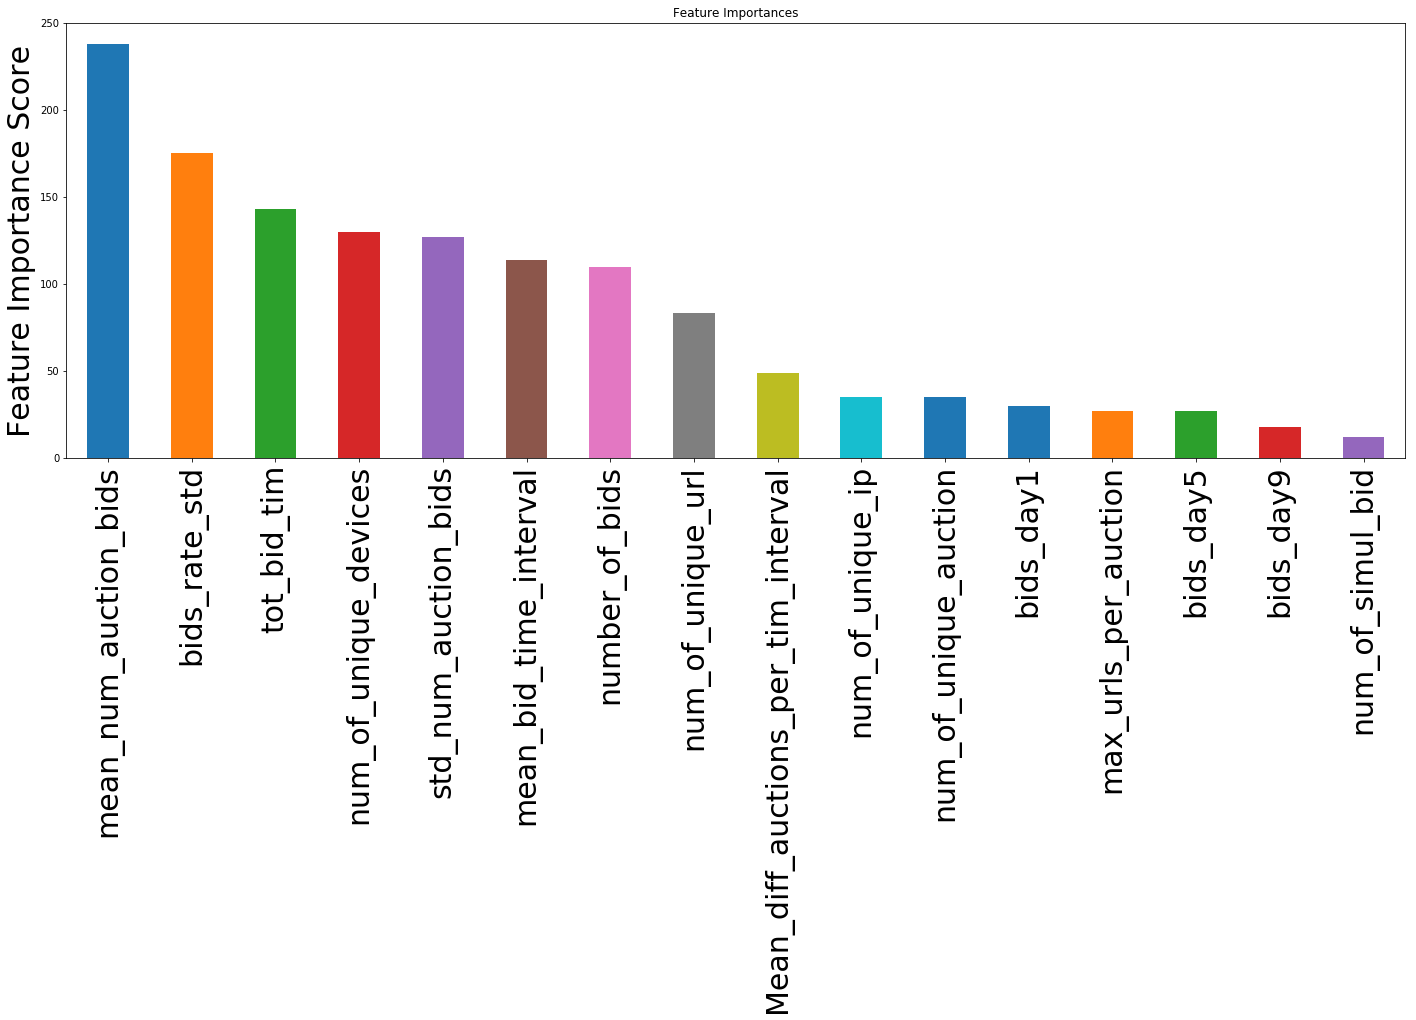

In [208]:

xgb1=XGBClassifier(learning_rate=0.001,n_estimators=100,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',scale_pos_weight=19,seed=10)

modelfit(xgb1,feature_set,label_set_drop,useTrainCV=False,n_repeats=5)

In [209]:
#Fit the model
xgb1=XGBClassifier(learning_rate=0.001,n_estimators=100,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',scale_pos_weight=19,seed=10)

predictor=xgb1.fit(feature_set,label_set_drop.values.ravel(),eval_metric='auc')

In [201]:
test_set=pd.DataFrame()
test_set['bidder_id']=train_data.loc[train_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']

test_set.reset_index(inplace=True)
test_set=test_set.drop(['index'],axis=1)


# Number of unique auctions,urls,ips
test_set['num_of_unique_auction']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id'])['auction'].nunique()).reindex(index=test_set['bidder_id']).reset_index()['auction']
test_set['num_of_unique_url']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id'])['url'].nunique()).reindex(index=test_set['bidder_id']).reset_index()['url']
test_set['num_of_unique_ip']=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id'])['ip'].nunique()).reindex(index=test_set['bidder_id']).reset_index()['ip']


# Number of simultaneous bids 
df=pd.DataFrame(bid_data.loc[bid_data['bidder_id'].isin(list(test_set['bidder_id']))].groupby(['bidder_id','time']).count()['bid_id'])
test_set['num_of_simul_bid']=pd.DataFrame(df[df['bid_id']>1].groupby(['bidder_id']).count()).reindex(index=test_set['bidder_id']).reset_index().fillna(0)['bid_id']


#preprocessing of the features
test_set=test_set.drop(['bidder_id'],axis=1)
numerical=['num_of_unique_auction','num_of_unique_url','num_of_unique_ip','num_of_simul_bid']

#Skewed data preprocessed by log transformation
test_more_feature_set=test_set.copy()
test_more_feature_set[numerical]=test_more_feature_set[numerical].apply(lambda x:np.log(x+1))


#Data preprocessed by MinMaxScaler
scalar=MinMaxScaler()

test_more_feature_set[numerical]=scalar.fit_transform(test_more_feature_set[numerical])

#Reading the former test feature set
test_feature_set=pd.read_csv('test_feature_v1.csv',index_col=0)

#Concating the feature sets
test_feature_set=pd.concat([test_feature_set,test_more_feature_set],axis=1)
display(test_feature_set.head())


#save the feature set and label set
test_feature_set.to_csv('test_feature_v2.csv')

,mean_num_auction_bids,mean_bid_time_interval,max_urls_per_auction,number_of_bids,num_of_unique_devices,tot_bid_tim,bids_day1,bids_day2,bids_day3,bids_day4,...,bids_day7,bids_day8,bids_day9,bids_rate_std,std_num_auction_bids,Mean_diff_auctions_per_tim_interval,num_of_unique_auction,num_of_unique_url,num_of_unique_ip,num_of_simul_bid
0,0.023721,0.937210,0.049271,0.080770,0.058406,0.996996,0.095795,0.0,0.0,0.0,...,0.0,0.0,0.0,0.006263,0.053507,0.000000,0.336039,0.000000,0.215083,0.0
1,0.034337,0.967153,0.000000,0.061100,0.099846,0.999468,0.095795,0.0,0.0,0.0,...,0.0,0.0,0.0,0.007739,0.062788,0.000000,0.000000,0.038202,0.063403,0.0
2,0.015662,0.372055,0.049271,0.193682,0.131989,0.825446,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.074662,0.041649,0.310243,0.136770,0.038202,0.083814,0.0
3,0.042981,0.649446,0.182772,0.379991,0.534931,0.999681,0.361266,0.0,0.0,0.0,...,0.0,0.0,0.0,0.094114,0.129489,0.081618,0.000000,0.000000,0.000000,0.0
4,0.011129,0.601087,0.000000,0.219041,0.316505,0.922933,0.277115,0.0,0.0,0.0,...,0.0,0.0,0.0,0.056170,0.036647,0.212969,0.370909,0.360726,0.377515,0.0


In [210]:
# Predicting probability for test bidders
test_predprob_df=pd.DataFrame()
bug_test_df=pd.DataFrame()

test_predprob_df['bidder_id']=test_data.loc[test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
bug_test_df['bidder_id']=test_data.loc[~test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
bug_test_df['prediction']=-1


dtest_predprob=predictor.predict_proba(test_feature_set)[:,1]

test_predprob_df['prediction']=dtest_predprob


test_predprob_df=test_predprob_df.append(bug_test_df,ignore_index=True)

# Output the submission file
test_predprob_df.to_csv('submission_v2_lowlr_spw.csv',index=False)

This time the LB score decrease a lot: **private score 0.89654 and publich score 0.88499**. It seems that I have encountered **serious overfitting** with these new features, and the local CV stops working again.

Hence we are going back to the previous features.

# Models Ensembling

In [129]:
def model_fit_GBM(alg,train_set,label_set,cv_folds=10):
    
    cv_=RepeatedStratifiedKFold(n_splits=cv_folds,n_repeats=100,random_state=17)
    aucs=[]
    for train, val in cv_.split(train_set,label_set):
        
        probas_=alg.fit(train_set.iloc[train],label_set.iloc[train].values.ravel()).predict_proba(train_set.iloc[val])
        #compute ROC curve and AUC
        fpr,tpr,_=roc_curve(label_set.iloc[val].values.ravel(),probas_[:,1])
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)
    
    print('Mean AUC score is %f' % np.mean(aucs))


In [132]:
feature_set=pd.read_csv('feature_v1_no_1bid_bots.csv',index_col=0)
label_set=pd.read_csv('label_no_1bid_bots.csv',index_col=0)

In [133]:
gbm1=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=3,random_state=10)

model_fit_GBM(gbm1,feature_set,label_set)

Mean AUC score is 0.933332


In [137]:
gbm2=GradientBoostingClassifier(learning_rate=0.05,n_estimators=200,max_depth=5,random_state=20)

model_fit_GBM(gbm2,feature_set,label_set)

Mean AUC score is 0.934372


Optimum number of estimators is 61
Mean AUC score is 0.927391


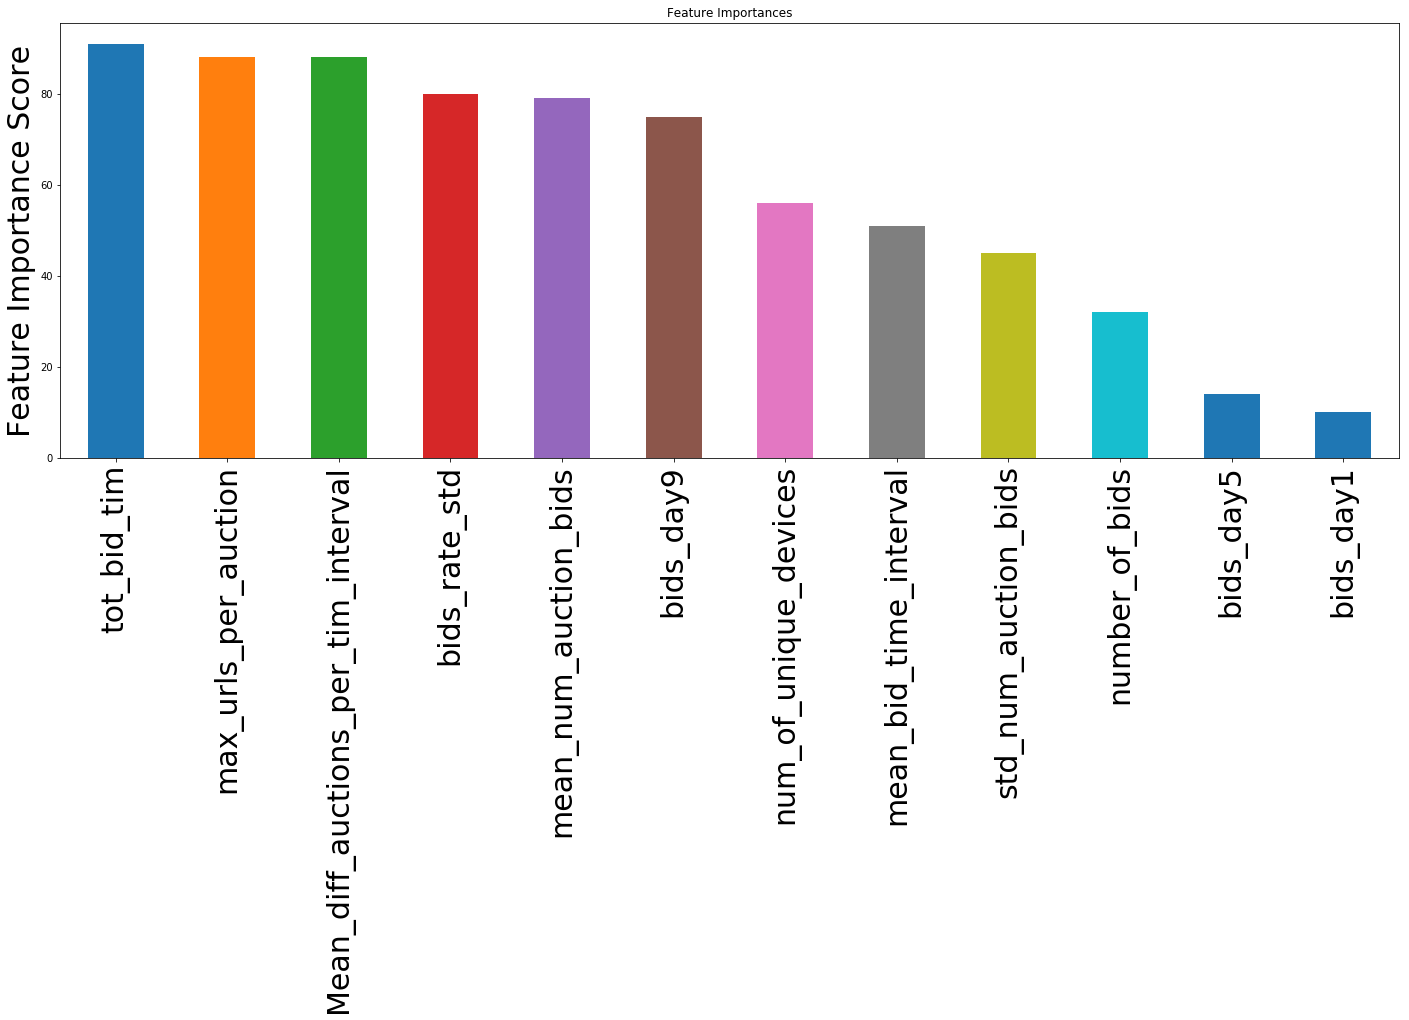

In [179]:
xgb1=XGBClassifier(learning_rate=0.0001,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',scale_pos_weight=1,seed=10)

modelfit(xgb1,feature_set,label_set,n_repeats=10)



In [178]:
xgb1=XGBClassifier(learning_rate=0.0001,n_estimators=61,max_depth=8,min_child_weight=1,gamma=1.3,subsample=0.8,colsample_bytree=0.75,objective='binary:logistic',scale_pos_weight=1,seed=10)
predictor=xgb1.fit(feature_set,label_set.values.ravel())
pred(predictor,test_feature_set,'submission_2_lowlr_spw.csv')

In [174]:
xgb2=XGBClassifier(learning_rate=0.05,n_estimators=1000,max_depth=8,min_child_weight=1,gamma=1.3,subsample=0.8,colsample_bytree=0.75,objective='binary:logistic',scale_pos_weight=20,seed=10)

modelfit(xgb2,feature_set,label_set)

Optimum number of estimators is 41


KeyboardInterrupt: 

In [141]:
xgb1=XGBClassifier(learning_rate=0.05,n_estimators=,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',scale_pos_weight=19.19,seed=10)
xgb2=XGBClassifier(learning_rate=0.05,n_estimators=,max_depth=8,min_child_weight=1,gamma=1.3,subsample=0.8,colsample_bytree=0.75,objective='binary:logistic',scale_pos_weight=19.19,seed=10)


predictor1=xgb1.fit(feature_set,label_set.values.ravel(),eval_metric='auc')
predictor2=xgb2.fit(feature_set,label_set.values.ravel(),eval_metric='auc')
predictor3=gbm1.fit(feature_set,label_set.values.ravel())
predictor4=gbm2.fit(feature_set,label_set.values.ravel())

In [139]:
test_feature_set=pd.read_csv('test_feature_v1.csv',index_col=0)

In [145]:
# Predicting probability for test bidders
test_predprob_df=pd.DataFrame()
bug_test_df=pd.DataFrame()
dtest_predprob=[]


test_predprob_df['bidder_id']=test_data.loc[test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
bug_test_df['bidder_id']=test_data.loc[~test_data['bidder_id'].isin(list(bid_data['bidder_id']))]['bidder_id']
bug_test_df['prediction']=-1


dtest_predprob.append(predictor1.predict_proba(test_feature_set)[:,1])
dtest_predprob.append(predictor2.predict_proba(test_feature_set)[:,1])
dtest_predprob.append(predictor3.predict_proba(test_feature_set)[:,1])
dtest_predprob.append(predictor3.predict_proba(test_feature_set)[:,1])


dtest_predprob=np.mean(dtest_predprob,axis=0)


test_predprob_df['prediction']=dtest_predprob


test_predprob_df=test_predprob_df.append(bug_test_df,ignore_index=True)

# Output the submission file
test_predprob_df.to_csv('submission_ensemble_1.csv',index=False)

With the ensembling of these 4 models(2 xgb and 2 gbm), the LB score become: private score 0.92271, public score 0.90035.